In [1]:
import sys
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import torch
import math
import importlib
import pandas as pd
#torch.set_num_threads(1)

sys.path.insert(0, '../../')
import python_lib.graph_gen as graph_gen
import python_lib.models as models
#from python_lib import solvers

import glob

In [2]:
%matplotlib inline

In [3]:
def file_name(args, net=False):
    if args.save_net == "yes":
        if not os.path.exists(args.save_dir+"nets/"):
            os.makedirs(args.save_dir+"nets/")

    if net:
        return args.save_dir + "nets/" + f"N{args.N}_seed{args.seed}_model{args.model}_net_spec{args.net_spec}_J{args.J:.2}_h{args.h:.2}_lr{args.lr:.2}_max_step{args.max_step}_batch_size{args.batch_size}_std_fe_limit{args.std_fe_limit:.2}"
    else:
        return args.save_dir + f"N{args.N}_seed{args.seed}_model{args.model}_net_spec{args.net_spec}"



In [12]:
data_dir="data/"
files = glob.glob(data_dir+"*.gzip")
#print(files)

In [13]:
model="SK"
hh=0.
JJ=1.
Ns=[20, 50, 100, 200]
net_specs = ["exact"]
data_exact=pd.DataFrame()
seeds=[1,2, 3, 4, 5, 6, 7, 8, 9, 10]
for seed in seeds:
    for N in Ns:
        for net_spec in net_specs:
            name_f = f"N{N}_seed{seed}_model{model}_net_spec{net_spec}"
            res = [i for i in files if name_f in i]
            if len(res) == 1:
                def repl(name_col):
                    return name_col.replace(net_spec, "")
                df_ = pd.read_pickle(res[0])
                df_ = df_.rename(repl, axis='columns')
                data_exact = pd.concat([data_exact, df_], ignore_index=True)
                print(f"read: {res[0]}")
            elif len(res) > 1:
                print(res)
                def repl(name_col):
                    return name_col.replace(net_spec, "")
                df_ = pd.read_pickle(res[0])
                df_ = df_.rename(repl, axis='columns')
                data_exact = pd.concat([data_exact, df_], ignore_index=True)
                print(f"read: {res[0]}")
            else:
                print("not found")


not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found


In [14]:
net_specs = [ "SK_0rsb", "SK_1rsb","SK_2rsb", "SL", "MADE_21", "MADE_22", "MADE_23", "MADE_32"]
data=pd.DataFrame()
for seed in seeds:
    for N in Ns:
        for net_spec in net_specs:
            name_f = f"N{N}_seed{seed}_model{model}_net_spec{net_spec}"
            res = [i for i in files if name_f in i]
            if len(res) == 1:
                def repl(name_col):
                    return name_col.replace(net_spec, "")
                df_ = pd.read_pickle(res[0])
                df_ = df_.rename(repl, axis='columns')
                data = pd.concat([data, df_], ignore_index=True)
                print(f"read: {res[0]}")
            elif len(res) > 1:
                print(res)
                def repl(name_col):
                    return name_col.replace(net_spec, "")
                df_ = pd.read_pickle(res[0])
                df_ = df_.rename(repl, axis='columns')
                data = pd.concat([data, df_], ignore_index=True)
                print(f"read: {res[0]}")

read: data/N50_seed1_modelSK_net_specSK_0rsb_20230307_152150.gzip
read: data/N50_seed1_modelSK_net_specSK_1rsb_20230307_163326.gzip
read: data/N50_seed1_modelSK_net_specSK_2rsb_20230308_014717.gzip
read: data/N50_seed1_modelSK_net_specSL_20230307_140731.gzip
read: data/N50_seed1_modelSK_net_specMADE_21_20230307_141807.gzip
read: data/N50_seed1_modelSK_net_specMADE_22_20230307_143432.gzip
['data/N50_seed1_modelSK_net_specMADE_23_20230307_234215.gzip', 'data/N50_seed1_modelSK_net_specMADE_23_20230307_233851.gzip']
read: data/N50_seed1_modelSK_net_specMADE_23_20230307_234215.gzip
['data/N50_seed1_modelSK_net_specMADE_32_20230307_234857.gzip', 'data/N50_seed1_modelSK_net_specMADE_32_20230307_234536.gzip']
read: data/N50_seed1_modelSK_net_specMADE_32_20230307_234857.gzip
read: data/N100_seed1_modelSK_net_specSK_0rsb_20230308_032849.gzip
read: data/N100_seed1_modelSK_net_specSK_1rsb_20230308_052652.gzip
read: data/N100_seed1_modelSK_net_specSK_2rsb_20230308_203105.gzip
read: data/N100_seed1_

In [15]:
data['seed'] = data['seed'].astype('int')
data['N'] = data['N'].astype('int')
data['beta'] = data['beta'].astype('float')
#data_exact['seed'] = data_exact['seed'].astype('int')
#data_exact['N'] = data_exact['N'].astype('int')

In [17]:
data["err_fe"] = 0
data["err_fe_rel"] = 0
for N in Ns:
    print(N)
    for seed in seeds:
        d_ = data[(data["N"] == N) & (data["seed"] == seed)]
        to_set = []
        to_set_res = []

        for index, row in d_.iterrows():
            beta =  row["beta"]
            net_spec = "SK_2rsb"
            fe_ex = d_[(np.abs(d_["beta"]-beta)<1e-6) & (d_["net_spec"]==net_spec)]["free_energy_mean"].item()
            vv = d_.loc[index]["free_energy_mean"].item() - fe_ex
            data.at[index, "err_fe"] = vv
            data.at[index, "err_fe_rel"] = vv / np.abs(fe_ex)
        #data_all[N] = data[N].copy()

20
50
100
200


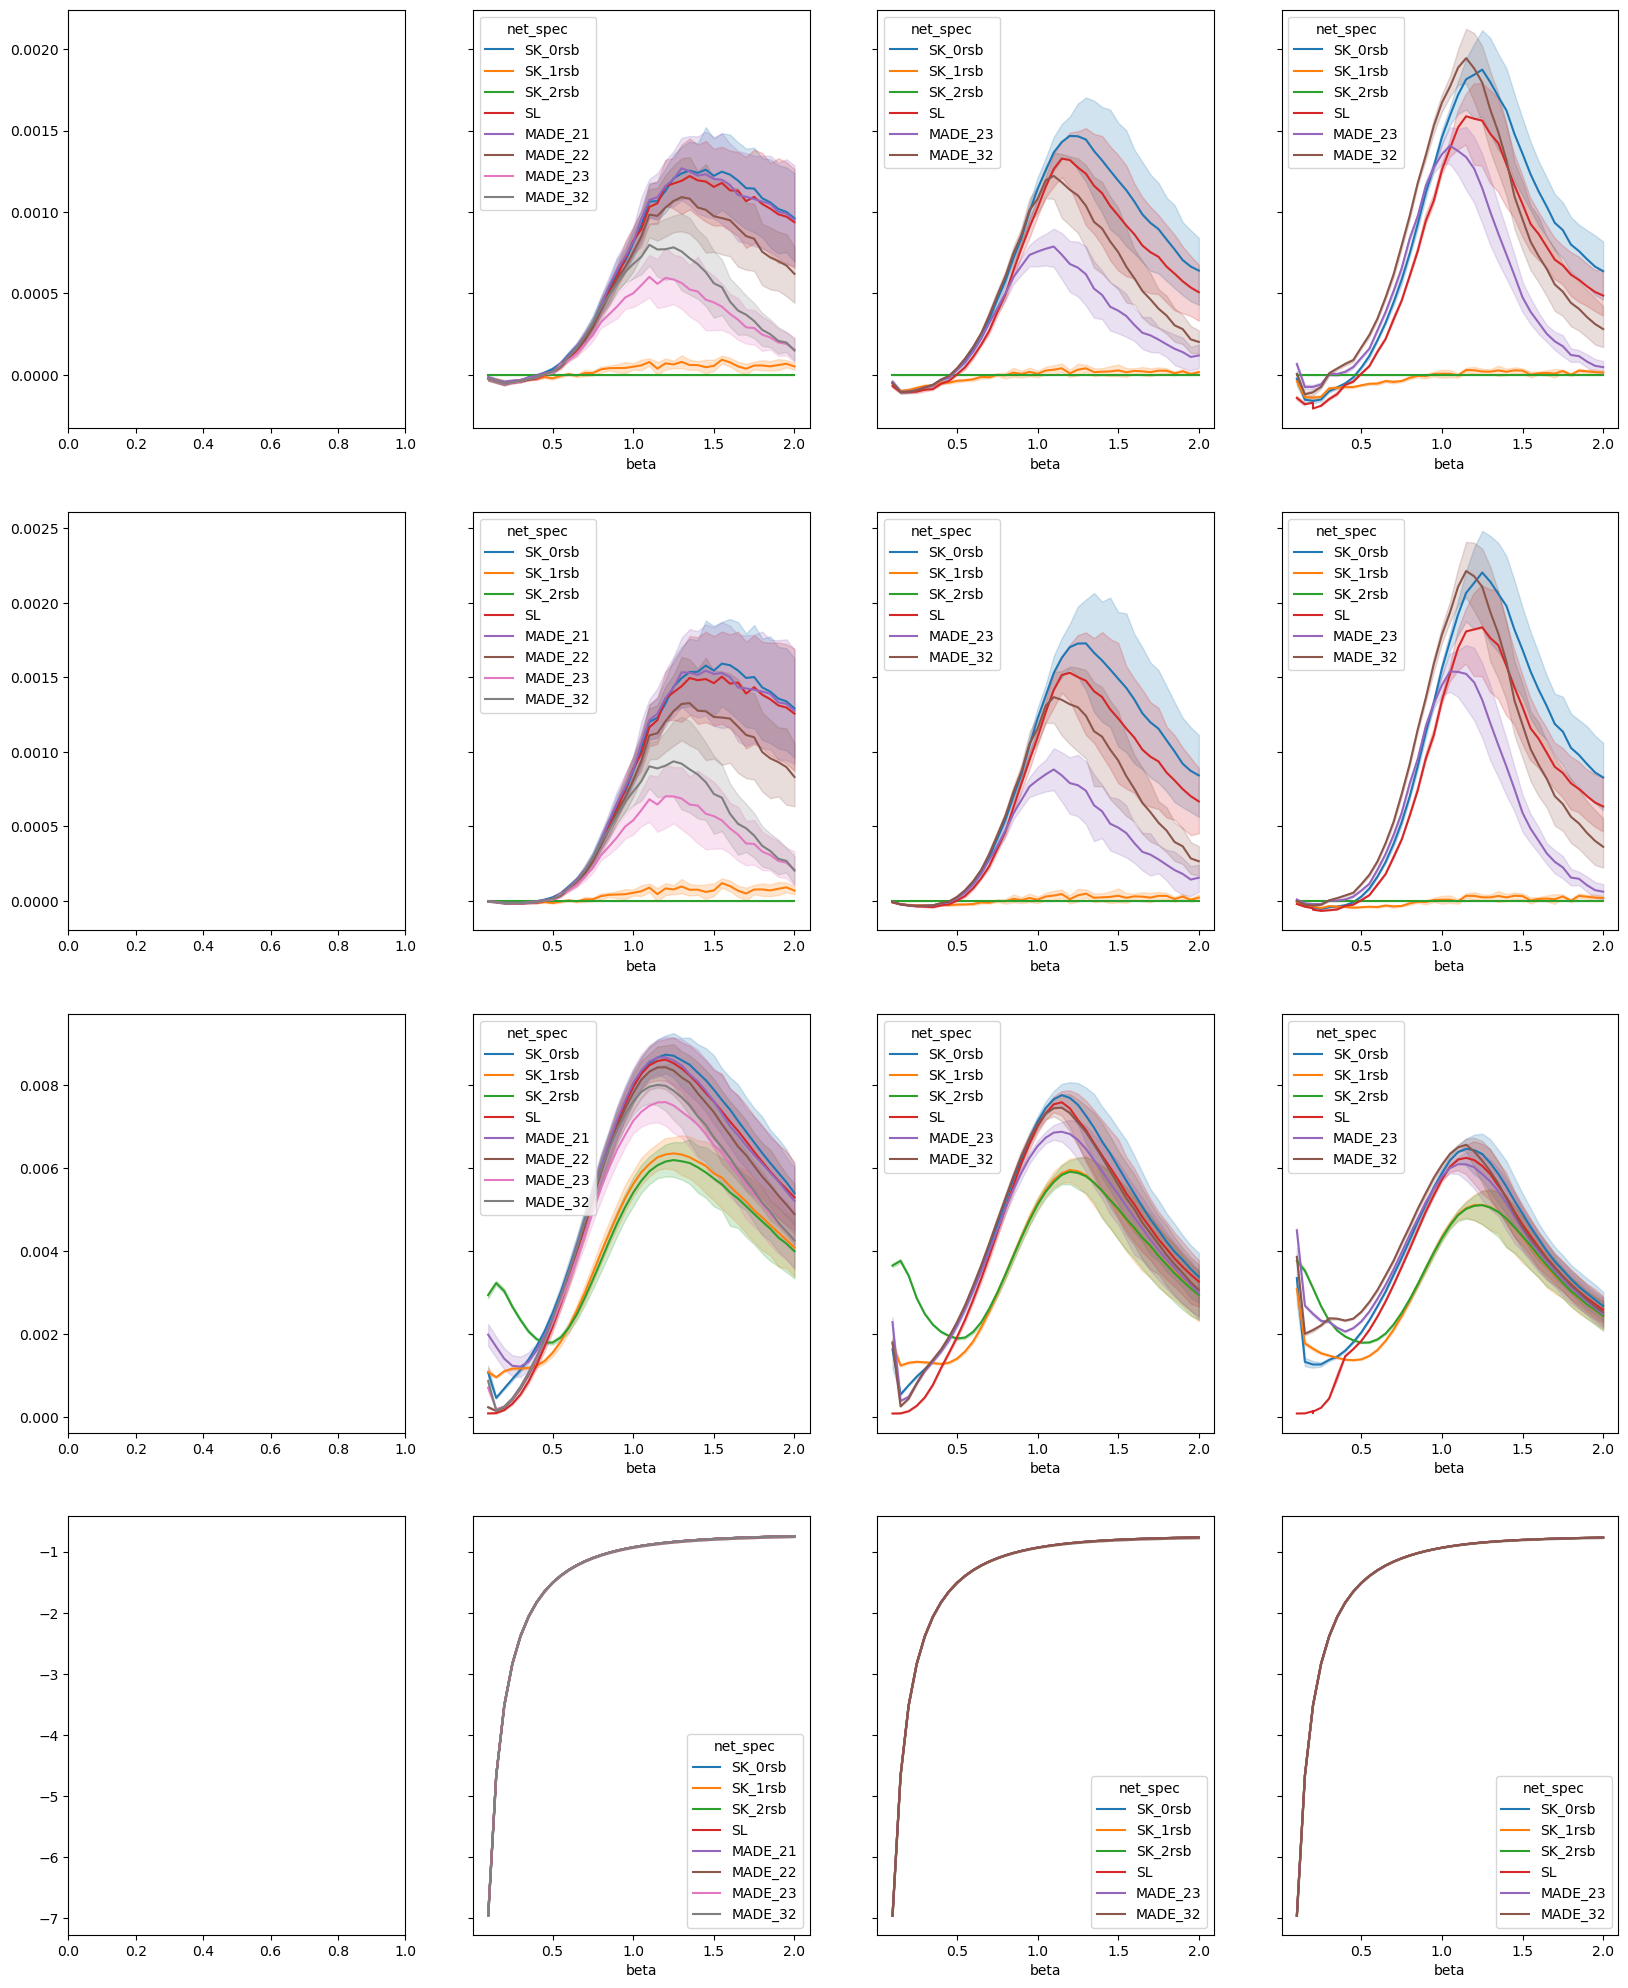

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

Ns=[20, 50, 100, 200]
fig, axs = plt.subplots(4,4, figsize=(20, 25), sharey="row")

for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    sns.lineplot(data=d_, x="beta", y="err_fe", hue="net_spec", ax=axs[0][i], legend="full")

for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    sns.lineplot(data=d_, x="beta", y="err_fe_rel", hue="net_spec", ax=axs[1][i], legend="full")

for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    sns.lineplot(data=d_, x="beta", y="free_energy_std", hue="net_spec", ax=axs[2][i], legend="full")

for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    sns.lineplot(data=d_, x="beta", y="free_energy_mean", hue="net_spec", ax=axs[3][i], legend="full")


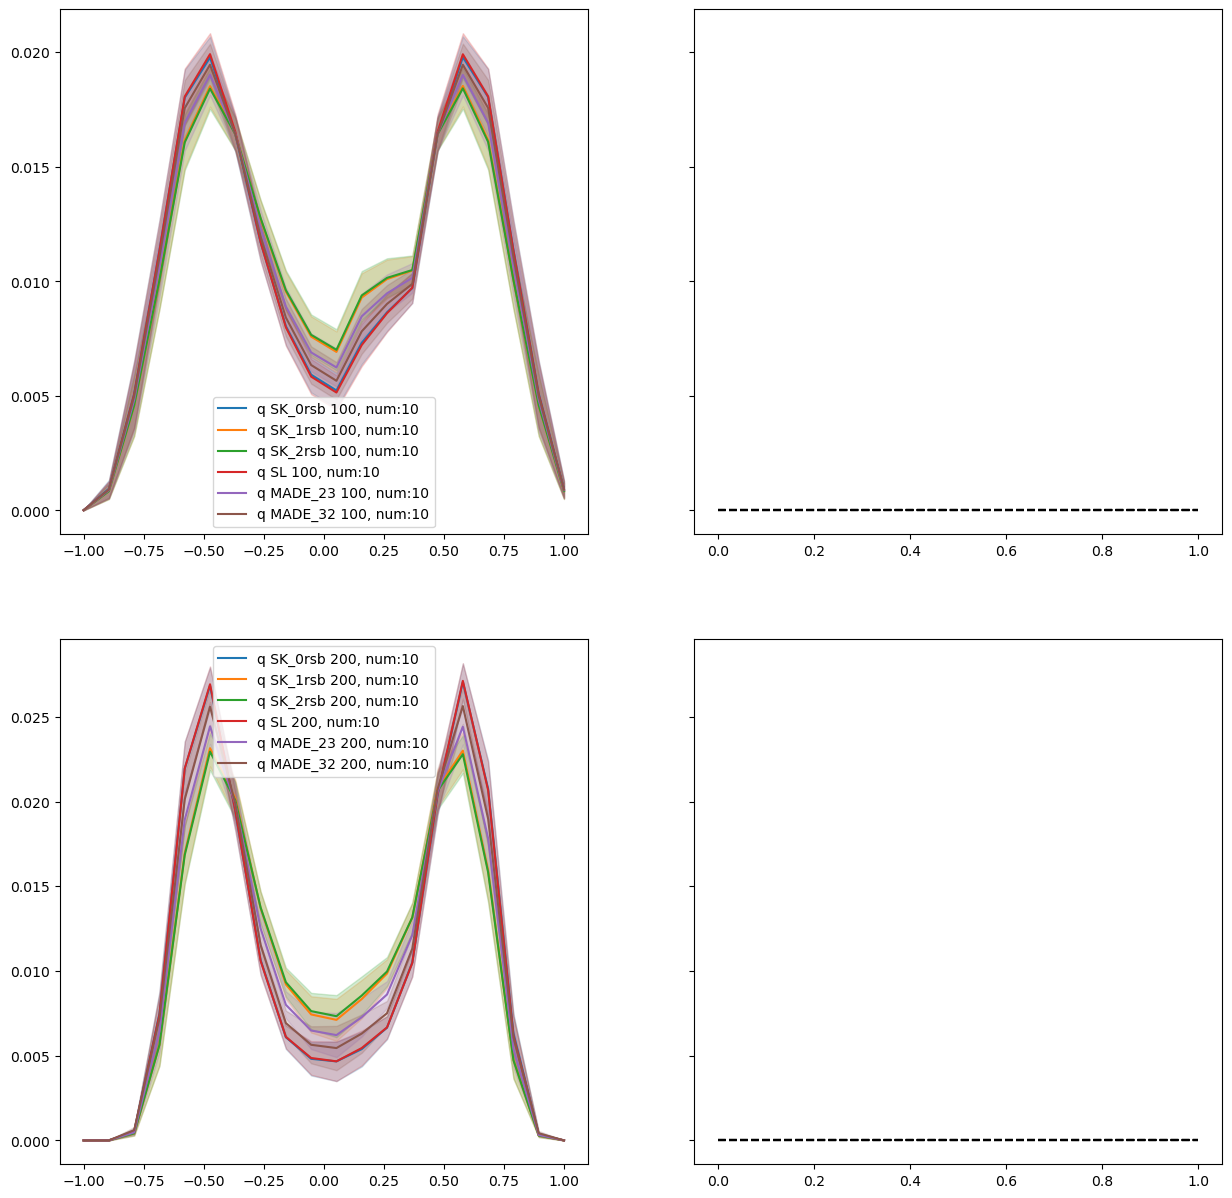

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

Ns=[100, 200]
fig, axs = plt.subplots(len(Ns),2, figsize=(15, 15), sharey="row")
beta=1.5
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6)]
m=2000
rr_avg = 5
for i, N in enumerate(Ns):
    for ii, nn in enumerate(net_specs):
        beta=2
        d_ = df_beta[(df_beta["net_spec"] == nn) & (df_beta["N"] == N)]
        #print(torch.tensor(d_["q"]))
        if len(d_) > 0:
            #print(d_["q"].iloc[0], d_["q"].iloc[1])
            axs[i][1].plot([0,1], [0,0], linestyle="dashed", color="black")
            res = torch.stack([d_["q"].iloc[i] for i in range(len(d_["q"]))], dim=1)/(m**2)
            avgs = moving_average(res.mean(dim=1),rr_avg)
            stds = moving_average(res.std(dim=1),rr_avg)/np.sqrt(10*rr_avg)
            #avgs = (np.flip(avgs[:int(len(avgs)/2)], 0) + avgs[int(len(avgs)/2):]) / 2
            #stds = (np.flip(stds[:int(len(stds)/2)],0) + stds[int(len(stds)/2):]) / 2
            avgs = avgs[0::rr_avg]
            stds = stds[0::rr_avg]
            #sns.lineplot(data=d_, x="beta", y="err_fe", hue="net_spec", ax=axs[i][ii], legend="full")
            #print(res.mean(dim=1).shape, avgs.shape)
            #print(res.shape, d_.seed)
            #axs[i][0].errorbar(x = np.linspace(-1,1, len(avgs)), y=avgs, yerr=stds, label=f"q {nn} {N}, num:{res.shape[1]}")
            x = np.linspace(-1,1, len(avgs))
            p = axs[i][0].plot(x, avgs, label=f"q {nn} {N}, num:{res.shape[1]}")
            axs[i][0].fill_between(x, avgs-stds, avgs+stds, alpha=0.2, color=p[0].get_color())

            #axs[i][ii].hist(np.linspace(-1,1, 100), weights=res, bins=100, label=f"q {nn} {N}")
            axs[i][0].legend()
            #axs[i][0].set_ylim(-0., 0.005)

In [20]:
beta=2
N=200
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6) & (data["N"] == N)]


In [21]:
df_q = []
m=2000
for e in df_beta.iterrows():
    for ii, qq in enumerate(e[1]["q"]):
        df_q.append({"q":qq.numpy()/(m**2), "net_spec":e[1]["net_spec"], "x": 2*ii/len(e[1]["q"]) - 1})
df_q = pd.DataFrame(df_q)

/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_85394/2286061824.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["mean_density"] = group["mean"]/norm
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_85394/2286061824.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["mean_density"] = group["mean"]/norm
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_85394/2286061824.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

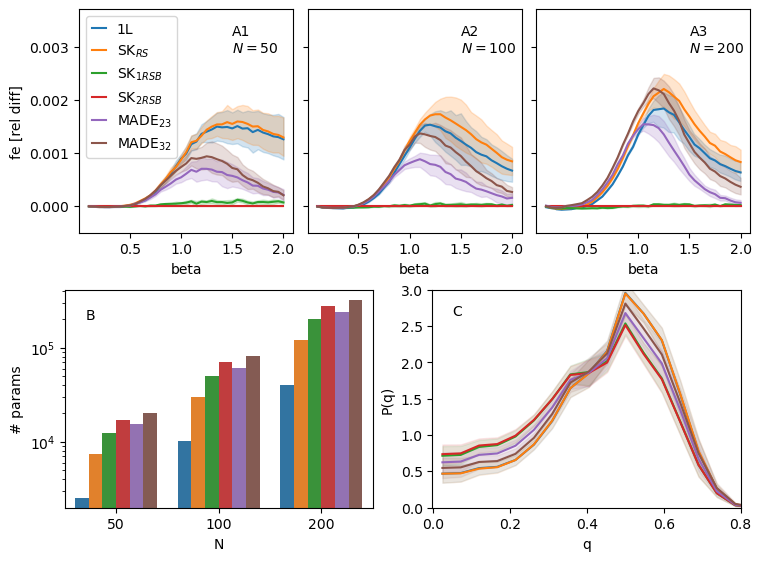

In [23]:
import itertools

fig = plt.figure(constrained_layout=True, figsize=(7.5, 5.5))
gs = fig.add_gridspec(2, 1)

gs00 = gs[0].subgridspec(1, 3)
gs01 = gs[1].subgridspec(1, 2)

to_pl_old=["SL", "SK_0rsb", "SK_1rsb", "SK_2rsb", "MADE_23", "MADE_32"]

replacement = {'SL': '1L', "SK_0rsb": 'SK$_{RS}$', "SK_1rsb": 'SK$_{1RSB}$', "SK_2rsb": 'SK$_{2RSB}$', 'MADE_23': 'MADE$_{23}$', 'MADE_32': 'MADE$_{32}$'}

to_plt = [replacement[key] for key in replacement]

axs = [[], []]
axs[0].append(fig.add_subplot(gs00[0,0]))
axs[0].append(fig.add_subplot(gs00[0,1]))
axs[0].append(fig.add_subplot(gs00[0,2]))
axs[1].append(fig.add_subplot(gs01[0,0]))
axs[1].append(fig.add_subplot(gs01[0,1]))
data['net_spec'] = data['net_spec'].replace(replacement)
data = data[data['net_spec'].isin(to_plt)]
Ns=[50, 100, 200]
# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    bb=sns.lineplot(data=d_, x="beta", y="err_fe_rel", hue="net_spec", ax=axs[0][i], legend="full", hue_order=to_plt)

dd_ = data[(data["N"] > 20)]
aa = dd_.groupby(["N", "net_spec"]).mean().reset_index()
aa["logN"] = np.log(aa["N"])
#for N in Ns:
#    aa[aa["N"]==N]["num_params"] = data[data["N"]==N]["num_params"] + N*N
sns.barplot(data=aa, x="logN", y="num_params", hue="net_spec", ax=axs[1][0], hue_order=to_plt)
axs[1][0].set_xticklabels(list(aa["N"].unique()))
#axs[0][0].legend()
#axs[0][0].legend().remove()
axs[0][1].legend().remove()
axs[0][2].legend().remove()
axs[1][0].legend().remove()

axs[0][0].set_ylabel("fe [rel diff]")
axs[0][1].set_ylabel("")
axs[0][2].set_ylabel("")
axs[0][1].set_yticklabels("")
axs[0][2].set_yticklabels("")
axs[0][0].set_ylim(-0.0005, 0.0037)
axs[0][1].set_ylim(-0.0005, 0.0037)
axs[0][2].set_ylim(-0.0005, 0.0037)

# axs[0][0].set_title(f"N={Ns[0]}")
# axs[0][1].set_title(f"N={Ns[1]}")
# axs[0][2].set_title(f"N={Ns[2]}")


axs[1][0].set_ylabel("# params")
axs[1][0].set_xticklabels(list(aa["N"].unique()))
axs[1][0].set_yscale("log")
axs[1][0].set_xlabel("N")

# plot overlap
beta=1.5
N=200
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6) & (data["N"] == N)]
df_q = []
m=2000
for e in df_beta.iterrows():
    for ii, qq in enumerate(e[1]["q"]):
        df_q.append({"q":qq.numpy()/(m**2), "net_spec":e[1]["net_spec"], "x": abs(2*ii/len(e[1]["q"]) - 1)})
        
df_q = pd.DataFrame(df_q)
n_bins = 21
# create the bins using the "cut" method
bins = np.linspace(0, 1, n_bins + 1)
df_q["binned_x"] = pd.cut(df_q["x"], bins=bins)

# group the data by the values of "net_spec" and the bins of "x"
grouped = df_q.groupby(["net_spec", "binned_x"])

# calculate the mean of the "q" column for each group
binned_q = grouped["q"].agg(["mean", "std", "count"]).reset_index()
# get the standard color cycle
colors = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
binned_q["mids"] = [x.mid for x in binned_q["binned_x"]] 
binned_q["length"] = [x.length for x in binned_q["binned_x"]] 

# plot the histograms
for name in to_plt:
    group = binned_q[binned_q["net_spec"] == name]
    color = next(colors)
    xx=group["length"].values
    yy=group["mean"].values
    norm =sum(xx*yy)
    #print(norm, xx)
    group["mean_density"] = group["mean"]/norm
    group.plot(x="mids", y="mean_density", kind="line", color=color, alpha=1, label=name, ax=axs[1][1], legend=False)
    y1= np.array(group["mean"]-group["std"]/np.sqrt(group["count"]).tolist())
    y2 = np.array(group["mean"]+group["std"]/np.sqrt(group["count"]).tolist())
    axs[1][1].fill_between(group["mids"], y1/norm, y2/norm, color=color, alpha=0.1)
axs[1][1].set_xlabel("q")
axs[1][1].set_ylabel("P(q)")
axs[1][1].set_xlim(-0.002, 0.8)
axs[1][1].set_ylim(-0.002, 3)

axs[0][0].get_legend().set_title("net")
axs[0][0].text(1.5, 0.0029, "A1\n$N=50$")
axs[0][1].text(1.5, 0.0029, "A2\n$N=100$")
axs[0][2].text(1.5, 0.0029, "A3\n$N=200$")
# axs[0][0].text(1.2, 0.0023, r"$N=50$")
# axs[0][1].text(1.2, 0.0023, r"$N=100$")
# axs[0][2].text(1.2, 0.0023, r"$N=200$")
axs[1][0].text(-0.3, 2e+5, "B")
axs[1][1].text(0.05, 2.65, "C")

axs[0][0].legend(handlelength=1,)

#sns.move_legend(axs[1][0],(2.4,0.9))    
#plt.tight_layout()
plt.savefig("../tex/img/SK_res.pdf")

NameError: name 'hue_order' is not defined

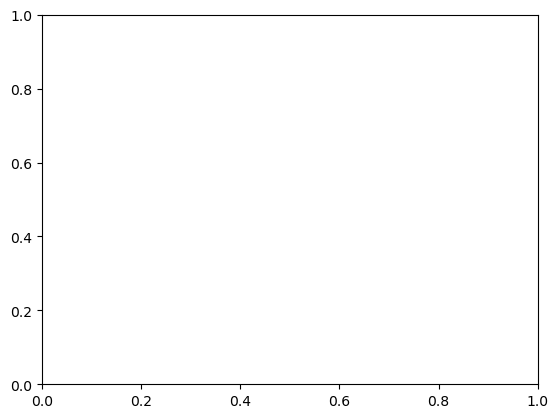

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
# specify the number of bins
beta=1.5
N=200
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6) & (data["N"] == N)]
df_q = []
m=2000
for e in df_beta.iterrows():
    for ii, qq in enumerate(e[1]["q"]):
        df_q.append({"q":qq.numpy()/(m**2), "net_spec":e[1]["net_spec"], "x": 2*ii/len(e[1]["q"]) - 1})
        
df_q = pd.DataFrame(df_q)
n_bins = 21
fig, ax = plt.subplots()
# create the bins using the "cut" method
bins = np.linspace(-1, 1, n_bins + 1)
df_q["binned_x"] = pd.cut(df_q["x"], bins=bins)

# group the data by the values of "net_spec" and the bins of "x"
grouped = df_q.groupby(["net_spec", "binned_x"])

# calculate the mean of the "q" column for each group
binned_q = grouped["q"].agg(["mean", "std", "count"]).reset_index()
# get the standard color cycle
colors = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
binned_q["mids"] = [x.mid for x in binned_q["binned_x"]] 
binned_q["length"] = [x.length for x in binned_q["binned_x"]] 

# plot the histograms
for name in hue_order:
    group = binned_q[binned_q["net_spec"] == name]
    color = next(colors)
    xx=group["length"].values
    yy=group["mean"].values
    norm =sum(xx*yy)
    #print(norm, xx)
    group["mean_density"] = group["mean"]/norm
    group.plot(x="mids", y="mean_density", kind="line", color=color, alpha=1, label=name, ax=ax)
    y1= np.array(group["mean"]-group["std"]/np.sqrt(group["count"]).tolist())
    y2 = np.array(group["mean"]+group["std"]/np.sqrt(group["count"]).tolist())
    ax.fill_between(group["mids"], y1/norm, y2/norm, color=color, alpha=0.2)
    

# add legend
plt.legend()

# show plot
plt.show()


In [ ]:
(bins[1:] + bins[:-1])

array([-1.93333333, -1.8       , -1.66666667, -1.53333333, -1.4       ,
       -1.26666667, -1.13333333, -1.        , -0.86666667, -0.73333333,
       -0.6       , -0.46666667, -0.33333333, -0.2       , -0.06666667,
        0.06666667,  0.2       ,  0.33333333,  0.46666667,  0.6       ,
        0.73333333,  0.86666667,  1.        ,  1.13333333,  1.26666667,
        1.4       ,  1.53333333,  1.66666667,  1.8       ,  1.93333333])

<AxesSubplot:xlabel='x', ylabel='q'>

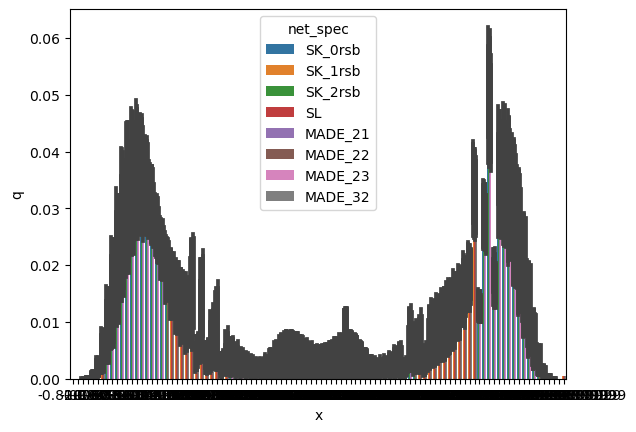

In [ ]:
sns.barplot(x="x", y="q", data=df_q, hue="net_spec")

In [43]:
data["net_spec"].unique()

array(['SK$_{RS}$', 'SK$_{1-RSB}$', 'SK$_{2-RSB}$', '1L', 'MADE_21',
       'MADE_22', 'MADE$_{32}$', 'MADE_32'], dtype=object)

/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_38462/1245853518.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["mean_density"] = group["mean"]/norm
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_38462/1245853518.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["mean_density"] = group["mean"]/norm
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_38462/1245853518.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

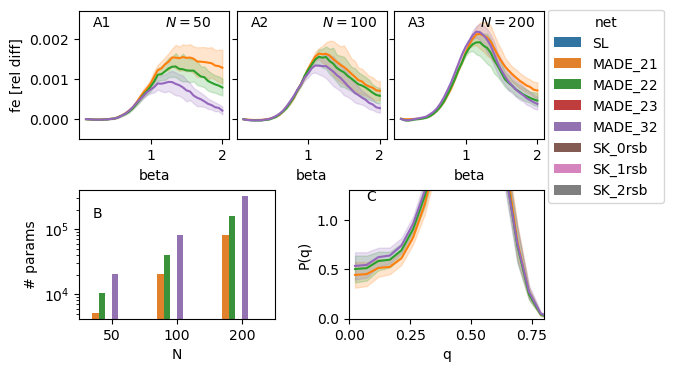

In [42]:
fig = plt.figure(figsize=(6, 4))
gs = fig.add_gridspec(2, 1, hspace=0.4)

gs00 = gs[0].subgridspec(1, 3, wspace=0.05)
gs01 = gs[1].subgridspec(1, 2, wspace=0.38)
to_pl_old=["SL", "SK_0rsb", "SK_1rsb", "SK_2rsb", "MADE_23", "MADE_32"]
replacement = {'SL': '1L', "SK_0rsb": 'SK$_{RS}$', "SK_1rsb": 'SK$_{1-RSB}$', "SK_2rsb": 'SK$_{2-RSB}$', 'MADE_23': 'MADE$_{23}$', 'MADE_32': 'MADE$_{32}$'}
to_plt = [replacement[key] for key in replacement]

axs = [[], []]
axs[0].append(fig.add_subplot(gs00[0,0]))
axs[0].append(fig.add_subplot(gs00[0,1]))
axs[0].append(fig.add_subplot(gs00[0,2]))
axs[1].append(fig.add_subplot(gs01[0,0]))
axs[1].append(fig.add_subplot(gs01[0,1]))
data['net_spec'] = data['net_spec'].replace(replacement)

Ns=[50, 100, 200]
# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    bb=sns.lineplot(data=d_, x="beta", y="err_fe_rel", hue="net_spec", ax=axs[0][i], legend="full", hue_order=hue_order)

dd_ = data[(data["N"] > 20)]
aa = dd_.groupby(["N", "net_spec"]).mean().reset_index()
aa["logN"] = np.log(aa["N"])
#for N in Ns:
#    aa[aa["N"]==N]["num_params"] = data[data["N"]==N]["num_params"] + N*N
sns.barplot(data=aa, x="logN", y="num_params", hue="net_spec", ax=axs[1][0], hue_order=hue_order)
axs[1][0].set_xticklabels(list(aa["N"].unique()))
#axs[0][0].legend()
axs[0][0].legend().remove()
axs[0][1].legend().remove()
axs[0][2].legend().remove()
axs[0][0].set_ylabel("fe [rel diff]")
axs[0][1].set_ylabel("")
axs[0][2].set_ylabel("")
axs[0][1].set_yticklabels("")
axs[0][2].set_yticklabels("")
axs[0][0].set_ylim(-0.0005, 0.0027)
axs[0][1].set_ylim(-0.0005, 0.0027)
axs[0][2].set_ylim(-0.0005, 0.0027)

# axs[0][0].set_title(f"N={Ns[0]}")
# axs[0][1].set_title(f"N={Ns[1]}")
# axs[0][2].set_title(f"N={Ns[2]}")


axs[1][0].set_ylabel("# params")
axs[1][0].set_xticklabels(list(aa["N"].unique()))
axs[1][0].set_yscale("log")
axs[1][0].set_xlabel("N")

# plot overlap
beta=1.5
N=200
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6) & (data["N"] == N)]
df_q = []
m=2000
for e in df_beta.iterrows():
    for ii, qq in enumerate(e[1]["q"]):
        df_q.append({"q":qq.numpy()/(m**2), "net_spec":e[1]["net_spec"], "x": abs(2*ii/len(e[1]["q"]) - 1)})
        
df_q = pd.DataFrame(df_q)
n_bins = 21
# create the bins using the "cut" method
bins = np.linspace(0, 1, n_bins + 1)
df_q["binned_x"] = pd.cut(df_q["x"], bins=bins)

# group the data by the values of "net_spec" and the bins of "x"
grouped = df_q.groupby(["net_spec", "binned_x"])

# calculate the mean of the "q" column for each group
binned_q = grouped["q"].agg(["mean", "std", "count"]).reset_index()
# get the standard color cycle
colors = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
binned_q["mids"] = [x.mid for x in binned_q["binned_x"]] 
binned_q["length"] = [x.length for x in binned_q["binned_x"]] 

# plot the histograms
for name in hue_order:
    group = binned_q[binned_q["net_spec"] == name]
    color = next(colors)
    xx=group["length"].values
    yy=group["mean"].values
    norm =sum(xx*yy)
    #print(norm, xx)
    group["mean_density"] = group["mean"]/norm
    group.plot(x="mids", y="mean_density", kind="line", color=color, alpha=1, label=name, ax=axs[1][1], legend=False)
    y1= np.array(group["mean"]-group["std"]/np.sqrt(group["count"]).tolist())
    y2 = np.array(group["mean"]+group["std"]/np.sqrt(group["count"]).tolist())
    axs[1][1].fill_between(group["mids"], y1/norm, y2/norm, color=color, alpha=0.2)
axs[1][1].set_xlabel("q")
axs[1][1].set_ylabel("P(q)")
axs[1][1].set_xlim(-0.002, 0.8)
axs[1][1].set_ylim(-0.002, 1.3)

axs[1][0].get_legend().set_title("net")
axs[0][0].text(0.2, 0.0023, "A1")
axs[0][1].text(0.2, 0.0023, "A2")
axs[0][2].text(0.2, 0.0023, "A3")
axs[0][0].text(1.2, 0.0023, r"$N=50$")
axs[0][1].text(1.2, 0.0023, r"$N=100$")
axs[0][2].text(1.2, 0.0023, r"$N=200$")
axs[1][0].text(-0.3, 1.5e+5, "B")
axs[1][1].text(0.07, 1.2, "C")
sns.move_legend(axs[1][0],(2.4,0.9))    
#plt.tight_layout()
plt.savefig("../tex/img/SK_res.pdf", bbox_inches='tight')

In [10]:
N=100
k=1
a = 0.5*N+N**2*(2*k+3)
b = 2*3*N**2 + 5*N
a, b

(50050.0, 60500)

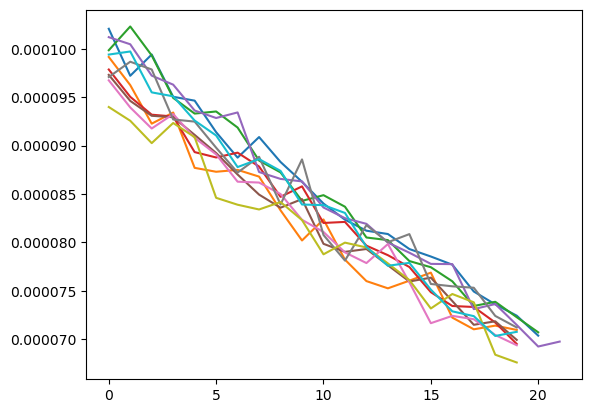

In [11]:
beta=0.1
N=200
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6) & (data["N"] == N) & (data["net_spec"] == "SL")]
for kk in df_beta["fe_std_run"]:
    plt.plot(kk)


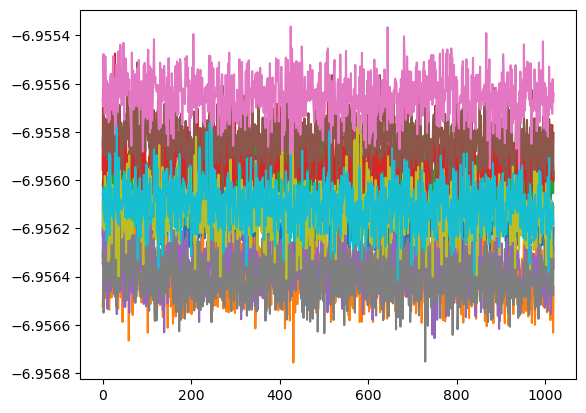

In [12]:
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6) & (data["N"] == N) & (data["net_spec"] == "SK_2rsb")]
for kk in df_beta["fe_run"]:
    plt.plot(kk)


In [13]:
beta=1
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6)]
df_beta.groupby(["N", "net_spec"]).mean()

beta  free_energy_mean  free_energy_std  entropy_mean  \
N   net_spec                                                          
20  MADE_21    1.0         -0.910142         0.007651      0.509950   
    MADE_22    1.0         -0.910222         0.007037      0.509592   
    MADE_23    1.0         -0.910400         0.005782      0.508893   
    MADE_32    1.0         -0.910418         0.005884      0.508949   
    SK_0rsb    1.0         -0.910194         0.007295      0.509796   
    SK_1rsb    1.0         -0.910555         0.004368      0.508747   
    SK_2rsb    1.0         -0.910569         0.004303      0.508626   
    SL         1.0         -0.910148         0.007635      0.509811   
50  MADE_21    1.0         -0.926411         0.008059      0.478185   
    MADE_22    1.0         -0.926480         0.007814      0.477815   
    MADE_23    1.0         -0.926749         0.007065      0.477357   
    MADE_32    1.0         -0.926547         0.007604      0.477472   
    SK_0rsb    1.0         -0.926418         0.007969      0.478194   
    SK_1rsb    1.0         -0.927178         0.005620      0.476679   
    SK_2rsb    1.0         -0.927228         0.005412      0.476510   
    SL         1.0         -0.926403         0.007969      0.478249   
100 MADE_21    1.0         -0.932771         0.007163      0.470079   
    MADE_22    1.0         -0.932792         0.007128      0.469833   
    MADE_23    1.0         -0.933185         0.006529      0.468578   
    MADE_32    1.0         -0.932878         0.007033      0.469142   
    SK_0rsb    1.0         -0.932784         0.007126      0.470062   
    SK_1rsb    1.0         -0.933925         0.005153      0.468073   
    SK_2rsb    1.0         -0.933933         0.005118      0.468039   
    SL         1.0         -0.932908         0.007011      0.469869   
200 MADE_21    1.0         -0.934236         0.005996      0.470893   
    MADE_22    1.0         -0.934270         0.005936      0.470503   
    MADE_23    1.0         -0.934420         0.005808      0.469748   
    MADE_32    1.0         -0.934106         0.006086      0.470212   
    SK_0rsb    1.0         -0.934330         0.005892      0.471121   
    SK_1rsb    1.0         -0.935773         0.004333      0.468628   
    SK_2rsb    1.0         -0.935786         0.004316      0.468777   
    SL         1.0         -0.934525         0.005727      0.470582   

              energy_mean           mag  mag_mean  num_params  \
N   net_spec                                                    
20  MADE_21     -0.400192 -2.025000e-04  0.183839       860.0   
    MADE_22     -0.400630 -3.210000e-04  0.184165      1700.0   
    MADE_23     -0.401507 -2.530000e-04  0.184093      2540.0   
    MADE_32     -0.401469  9.250032e-06  0.184215      3380.0   
    SK_0rsb     -0.400398 -6.930000e-04  0.184175      1180.0   
    SK_1rsb     -0.401808 -2.110001e-04  0.184208      1940.0   
    SK_2rsb     -0.401943 -4.699996e-05  0.184235      2700.0   
    SL          -0.400338  5.522500e-04  0.183941       420.0   
50  MADE_21     -0.448226  3.049000e-04  0.106494      5150.0   
    MADE_22     -0.448665  3.893001e-04  0.106480     10250.0   
    MADE_23     -0.449392 -4.048000e-04  0.106639     15350.0   
    MADE_32     -0.449075 -3.130005e-05  0.106192     20450.0   
    SK_0rsb     -0.448223  4.169000e-04  0.106611      7450.0   
    SK_1rsb     -0.450500 -3.583001e-04  0.106604     12350.0   
    SK_2rsb     -0.450717  6.530004e-05  0.106300     17250.0   
    SL          -0.448154 -1.116000e-04  0.106701      2550.0   
100 MADE_21     -0.462692 -1.552500e-04  0.076496     20300.0   
    MADE_22     -0.462959 -1.867500e-04  0.076581     40500.0   
    MADE_23     -0.464607  4.434998e-05  0.076355     60700.0   
    MADE_32     -0.463736 -7.210000e-05  0.076471     80900.0   
    SK_0rsb     -0.462722 -5.580000e-05  0.076468     29900.0   
    SK_1rsb     -0.465852 -2.994000e-04  0.076623     49700.0   
    SK_2rsb     -0.465894 -3.143500e-04

In [14]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w


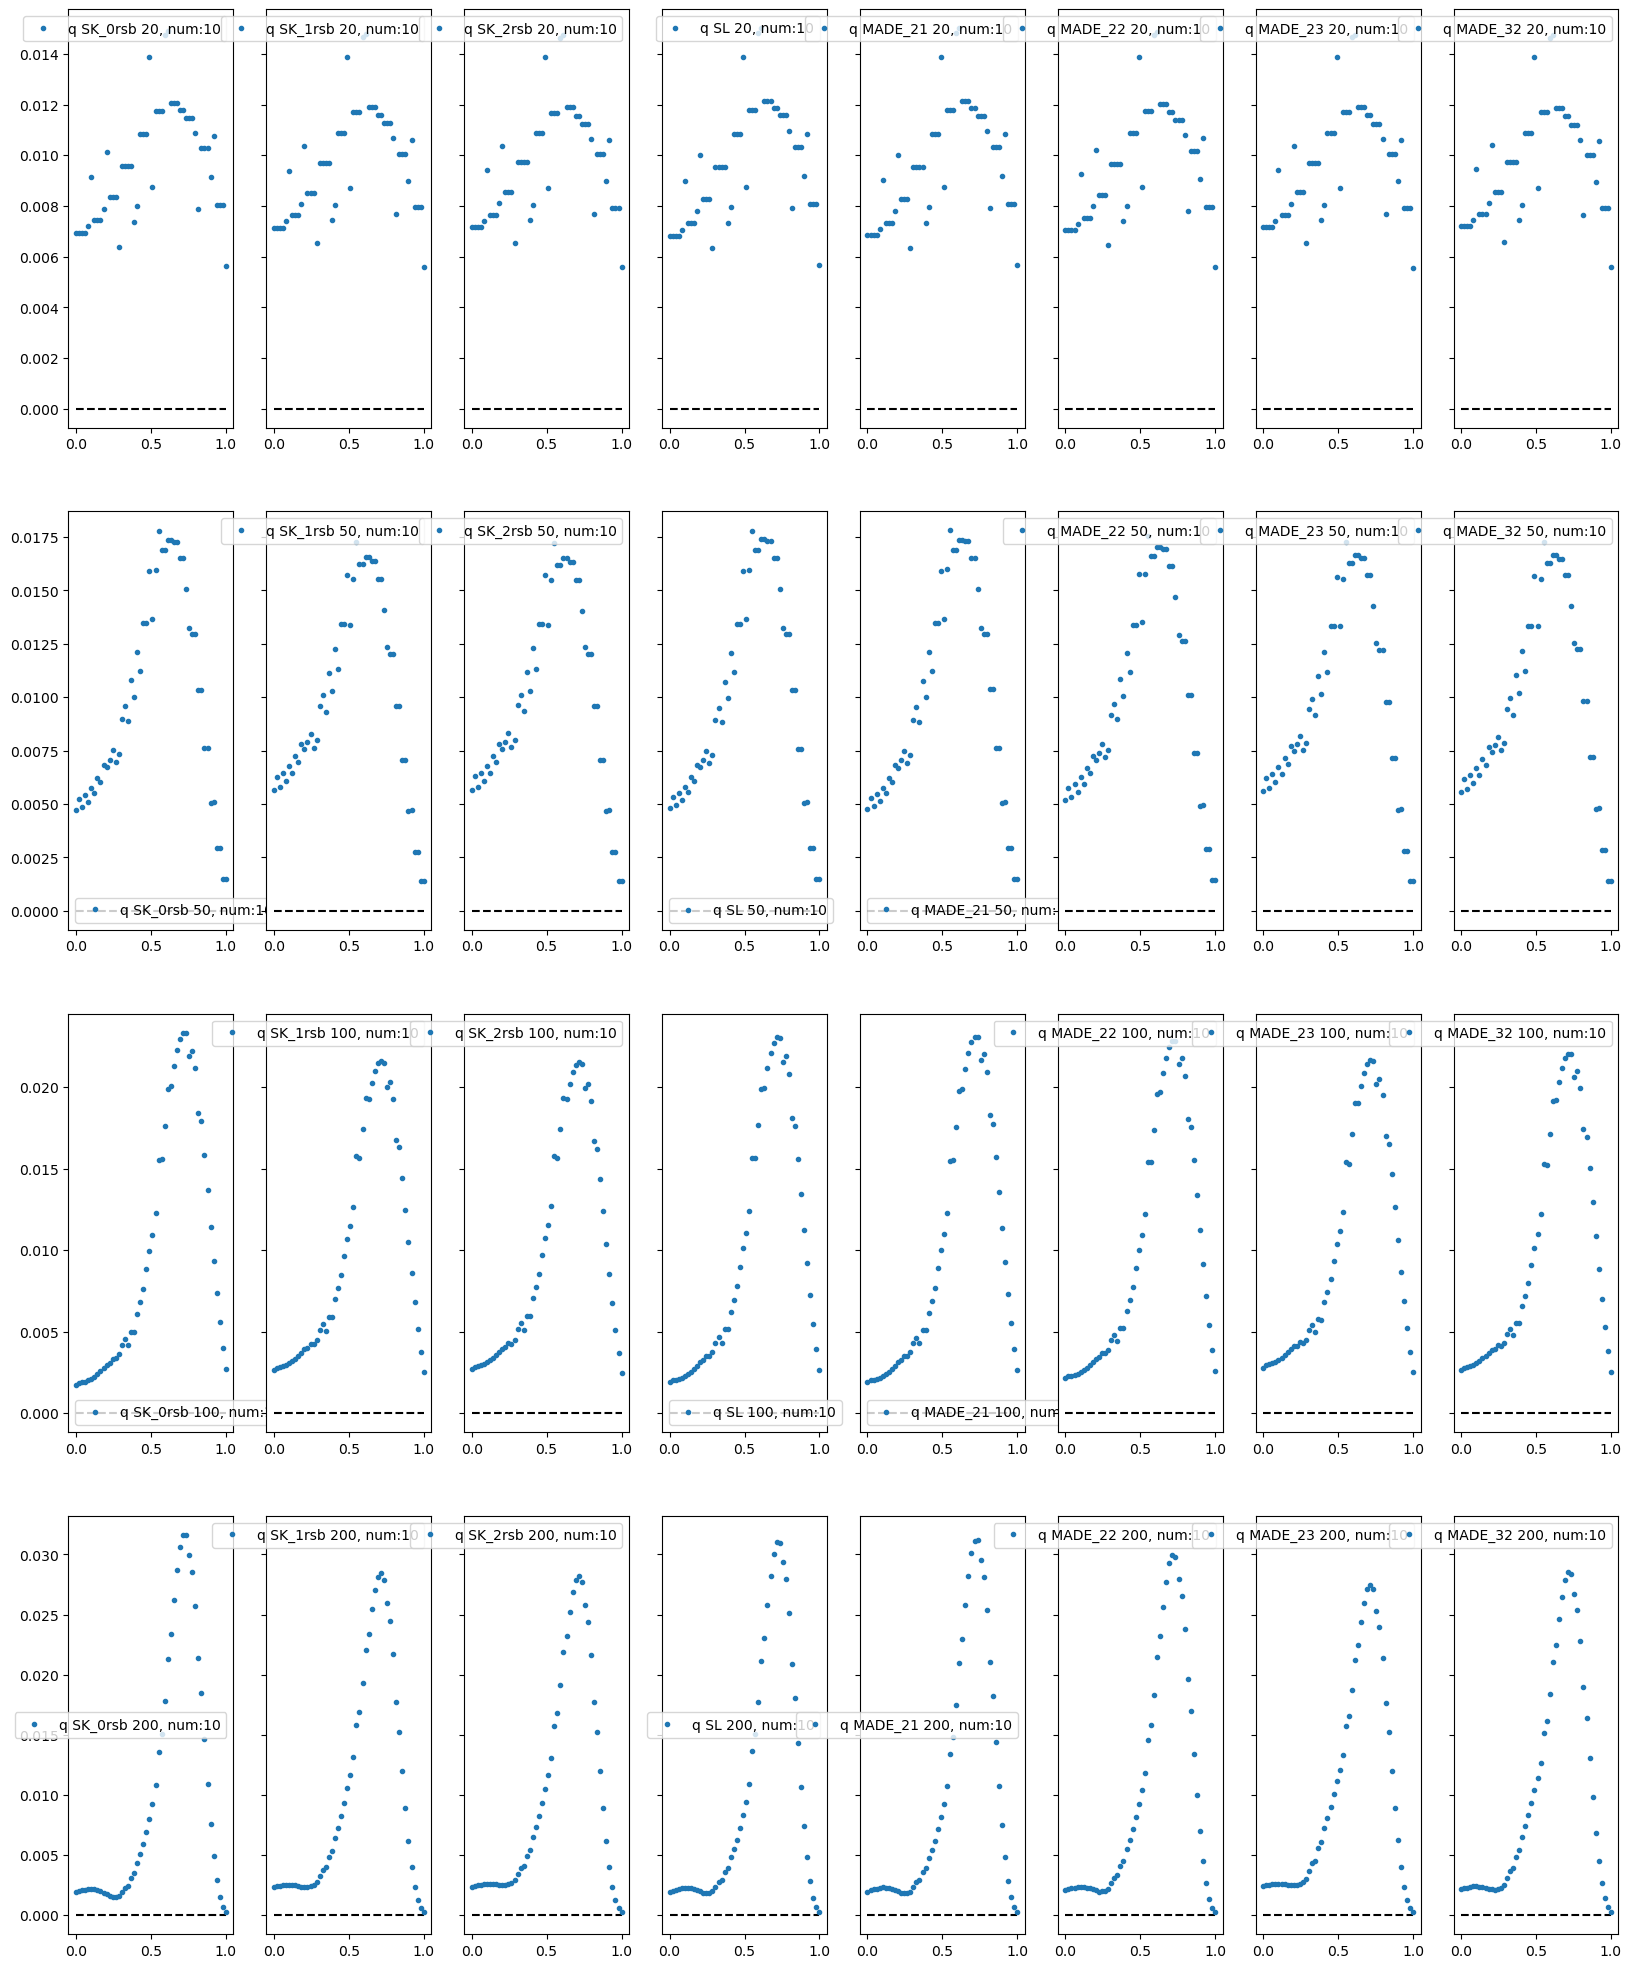

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

Ns=[20, 50, 100, 200]
fig, axs = plt.subplots(len(Ns),len(net_specs), figsize=(20, 25), sharey="row")
beta=2
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6)]
m=2000
rr_avg = 10
for i, N in enumerate(Ns):
    for ii, nn in enumerate(net_specs):
        d_ = data[(data["net_spec"] == nn) & (data["N"] == N) & (np.abs(data["beta"] - beta) < 1e-6)]
        #print(torch.tensor(d_["q"]))
        if len(d_) > 0:
            #print(d_["q"].iloc[0], d_["q"].iloc[1])
            axs[i][ii].plot([0,1], [0,0], linestyle="dashed", color="black")
            res = torch.stack([d_["q"].iloc[i] for i in range(len(d_["q"]))], dim=1)/(m**2)
            avgs = moving_average(res.mean(dim=1),rr_avg)
            stds = moving_average(res.std(dim=1),rr_avg)/np.sqrt(10)
            avgs = (np.flip(avgs[:int(len(avgs)/2)], 0) + avgs[int(len(avgs)/2):]) / 2
            stds = (np.flip(stds[:int(len(stds)/2)],0) + stds[int(len(stds)/2):]) / 2
            
            #sns.lineplot(data=d_, x="beta", y="err_fe", hue="net_spec", ax=axs[i][ii], legend="full")
            #print(res.mean(dim=1).shape, avgs.shape)
            #print(res.shape, d_.seed)
            axs[i][ii].errorbar(x = np.linspace(0,1, 50), y=avgs, label=f"q {nn} {N}, num:{res.shape[1]}", linestyle="None", marker=".")
            #axs[i][ii].hist(np.linspace(-1,1, 100), weights=res, bins=100, label=f"q {nn} {N}")
            axs[i][ii].legend()

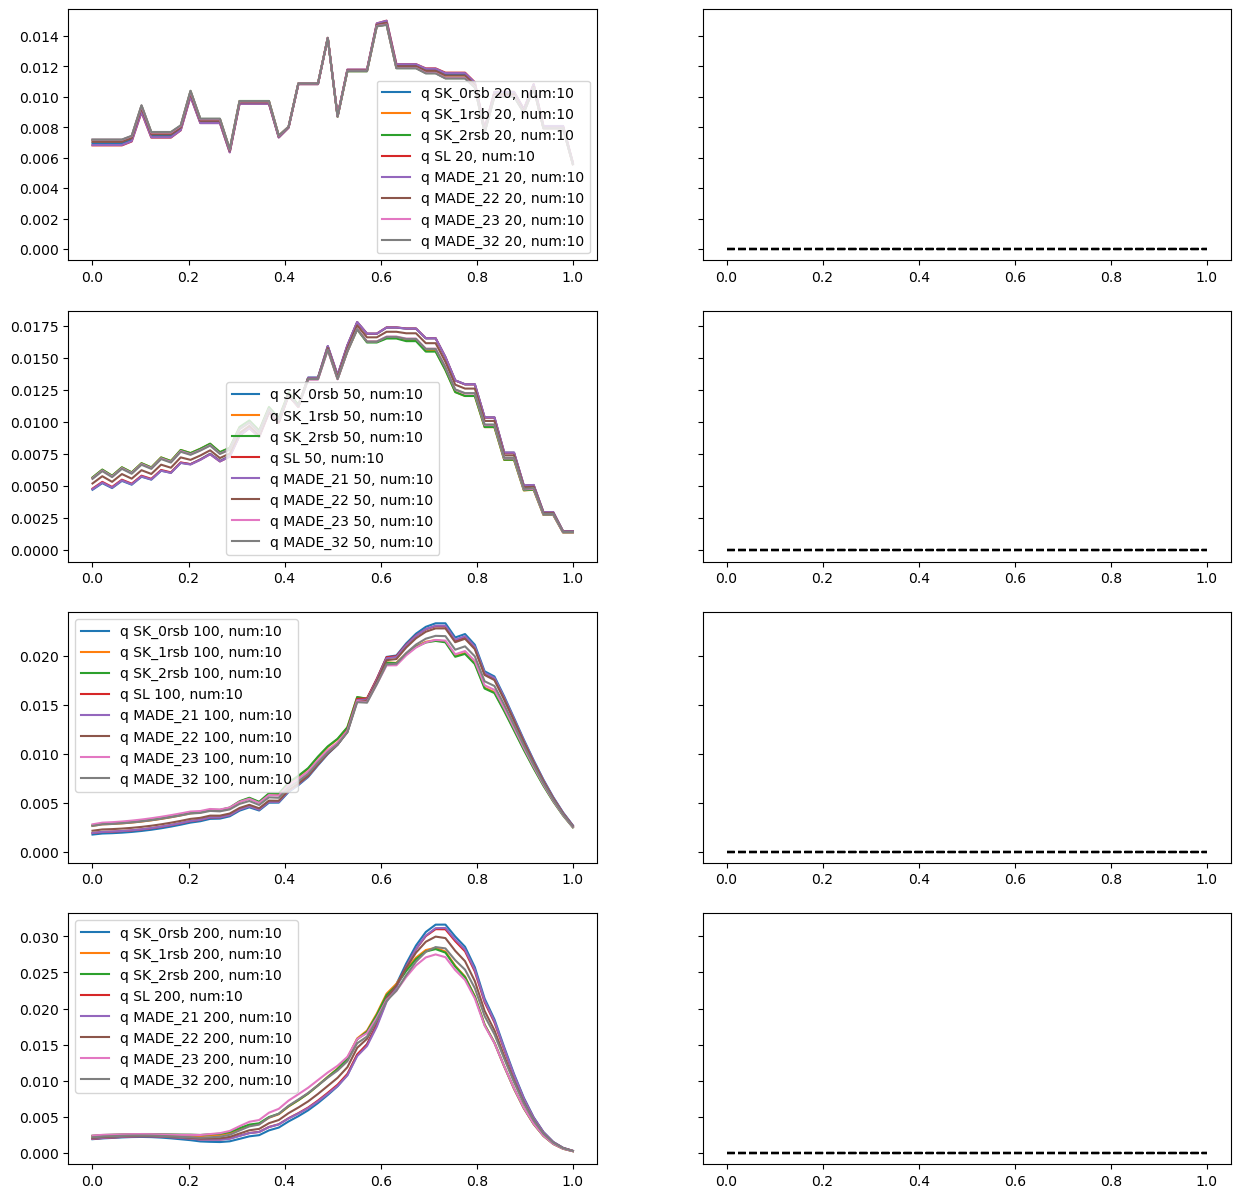

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

Ns=[20, 50, 100, 200]
fig, axs = plt.subplots(len(Ns),2, figsize=(15, 15), sharey="row")
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6)]
m=2000
rr_avg = 10
for i, N in enumerate(Ns):
    for ii, nn in enumerate(net_specs):
        d_ = data[(data["net_spec"] == nn) & (data["N"] == N) & (np.abs(data["beta"] - beta) < 1e-6)]
        #print(torch.tensor(d_["q"]))
        if len(d_) > 0:
            #print(d_["q"].iloc[0], d_["q"].iloc[1])
            axs[i][1].plot([0,1], [0,0], linestyle="dashed", color="black")
            res = torch.stack([d_["q"].iloc[i] for i in range(len(d_["q"]))], dim=1)/(m**2)
            avgs = moving_average(res.mean(dim=1),rr_avg)
            stds = moving_average(res.std(dim=1),rr_avg)/np.sqrt(10)
            avgs = (np.flip(avgs[:int(len(avgs)/2)], 0) + avgs[int(len(avgs)/2):]) / 2
            stds = (np.flip(stds[:int(len(stds)/2)],0) + stds[int(len(stds)/2):]) / 2
            
            #sns.lineplot(data=d_, x="beta", y="err_fe", hue="net_spec", ax=axs[i][ii], legend="full")
            #print(res.mean(dim=1).shape, avgs.shape)
            #print(res.shape, d_.seed)
            axs[i][0].errorbar(x = np.linspace(0,1, 50), y=avgs, label=f"q {nn} {N}, num:{res.shape[1]}")
            #axs[i][ii].hist(np.linspace(-1,1, 100), weights=res, bins=100, label=f"q {nn} {N}")
            axs[i][0].legend()
            #axs[i][0].set_ylim(-0., 0.015)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Ns=[20, 50, 100, 200]
beta=2
df_beta = data[(np.abs(data["beta"] - beta) < 1e-6)]
m=2000
rr_avg = 10
for i, N in enumerate(Ns):
    for ii, nn in enumerate(net_specs):
        beta=2
        d_ = data[(data["net_spec"] == nn) & (data["N"] == N) & (np.abs(data["beta"] - beta) < 1e-6)]
        #print(torch.tensor(d_["q"]))
        if len(d_) > 0:
            #print(d_["q"].iloc[0], d_["q"].iloc[1])
            res = torch.stack([d_["q"].iloc[i] for i in range(len(d_["q"]))], dim=1)/(m**2)
            avgs = moving_average(res.mean(dim=1),rr_avg)
            stds = moving_average(res.std(dim=1),rr_avg)/np.sqrt(10)
            avgs = (np.flip(avgs[:int(len(avgs)/2)], 0) + avgs[int(len(avgs)/2):]) / 2
            stds = (np.flip(stds[:int(len(stds)/2)],0) + stds[int(len(stds)/2):]) / 2
            
            #sns.lineplot(data=d_, x="beta", y="err_fe", hue="net_spec", ax=axs[i][ii], legend="full")
            #print(res.mean(dim=1).shape, avgs.shape)
            print(N, nn, len(d_.seed))
            print(d_.seed)
            #axs[i][ii].hist(np.linspace(-1,1, 100), weights=res, bins=100, label=f"q {nn} {N}")


20 SK_0rsb 10
38       1
974      2
1871     3
2807     4
3743     5
4640     6
5537     7
6395     8
7292     9
8189    10
Name: seed, dtype: int64
20 SK_1rsb 10
77       1
1013     2
1910     3
2846     4
3782     5
4679     6
5576     7
6434     8
7331     9
8228    10
Name: seed, dtype: int64
20 SK_2rsb 10
116      1
1052     2
1949     3
2885     4
3821     5
4718     6
5615     7
6473     8
7370     9
8267    10
Name: seed, dtype: int64
20 SL 10
155      1
1091     2
1988     3
2924     4
3860     5
4757     6
5654     7
6512     8
7409     9
8306    10
Name: seed, dtype: int64
20 MADE_21 10
194      1
1130     2
2027     3
2963     4
3899     5
4796     6
5693     7
6551     8
7448     9
8345    10
Name: seed, dtype: int64
20 MADE_22 10
233      1
1169     2
2066     3
3002     4
3938     5
4835     6
5732     7
6590     8
7487     9
8384    10
Name: seed, dtype: int64
50 SK_0rsb 10
272      1
1208     2
2105     3
3041     4
3977     5
4874     6
5771     7
6629     8
7526     

In [1]:
data.groupby(["N", "net_spec"]).mean()

NameError: name 'data' is not defined

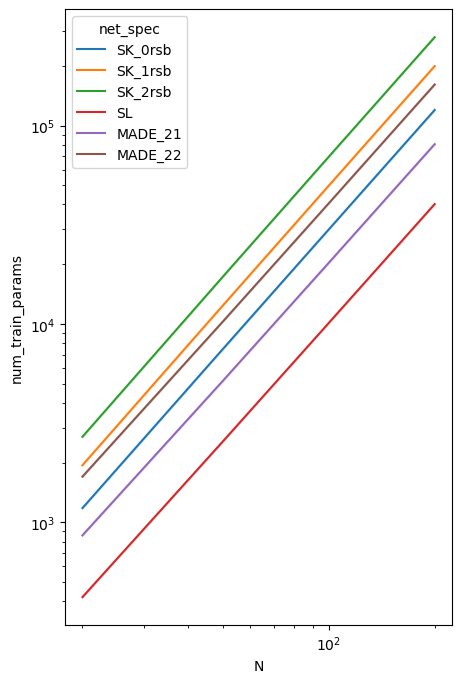

In [21]:
fig, axs = plt.subplots(1,1, figsize=(5, 8), sharey="row")
sns.lineplot(data=data, x="N", y="num_train_params", hue="net_spec", ax=axs)
axs.set_yscale("log")
axs.set_xscale("log")

In [26]:
a = torch.randint(0,2, (4,2))*2-1
print(a)
a@a.T

tensor([[-1,  1],
        [ 1,  1],
        [ 1,  1],
        [ 1, -1]])


tensor([[ 2,  0,  0, -2],
        [ 0,  2,  2,  0],
        [ 0,  2,  2,  0],
        [-2,  0,  0,  2]])

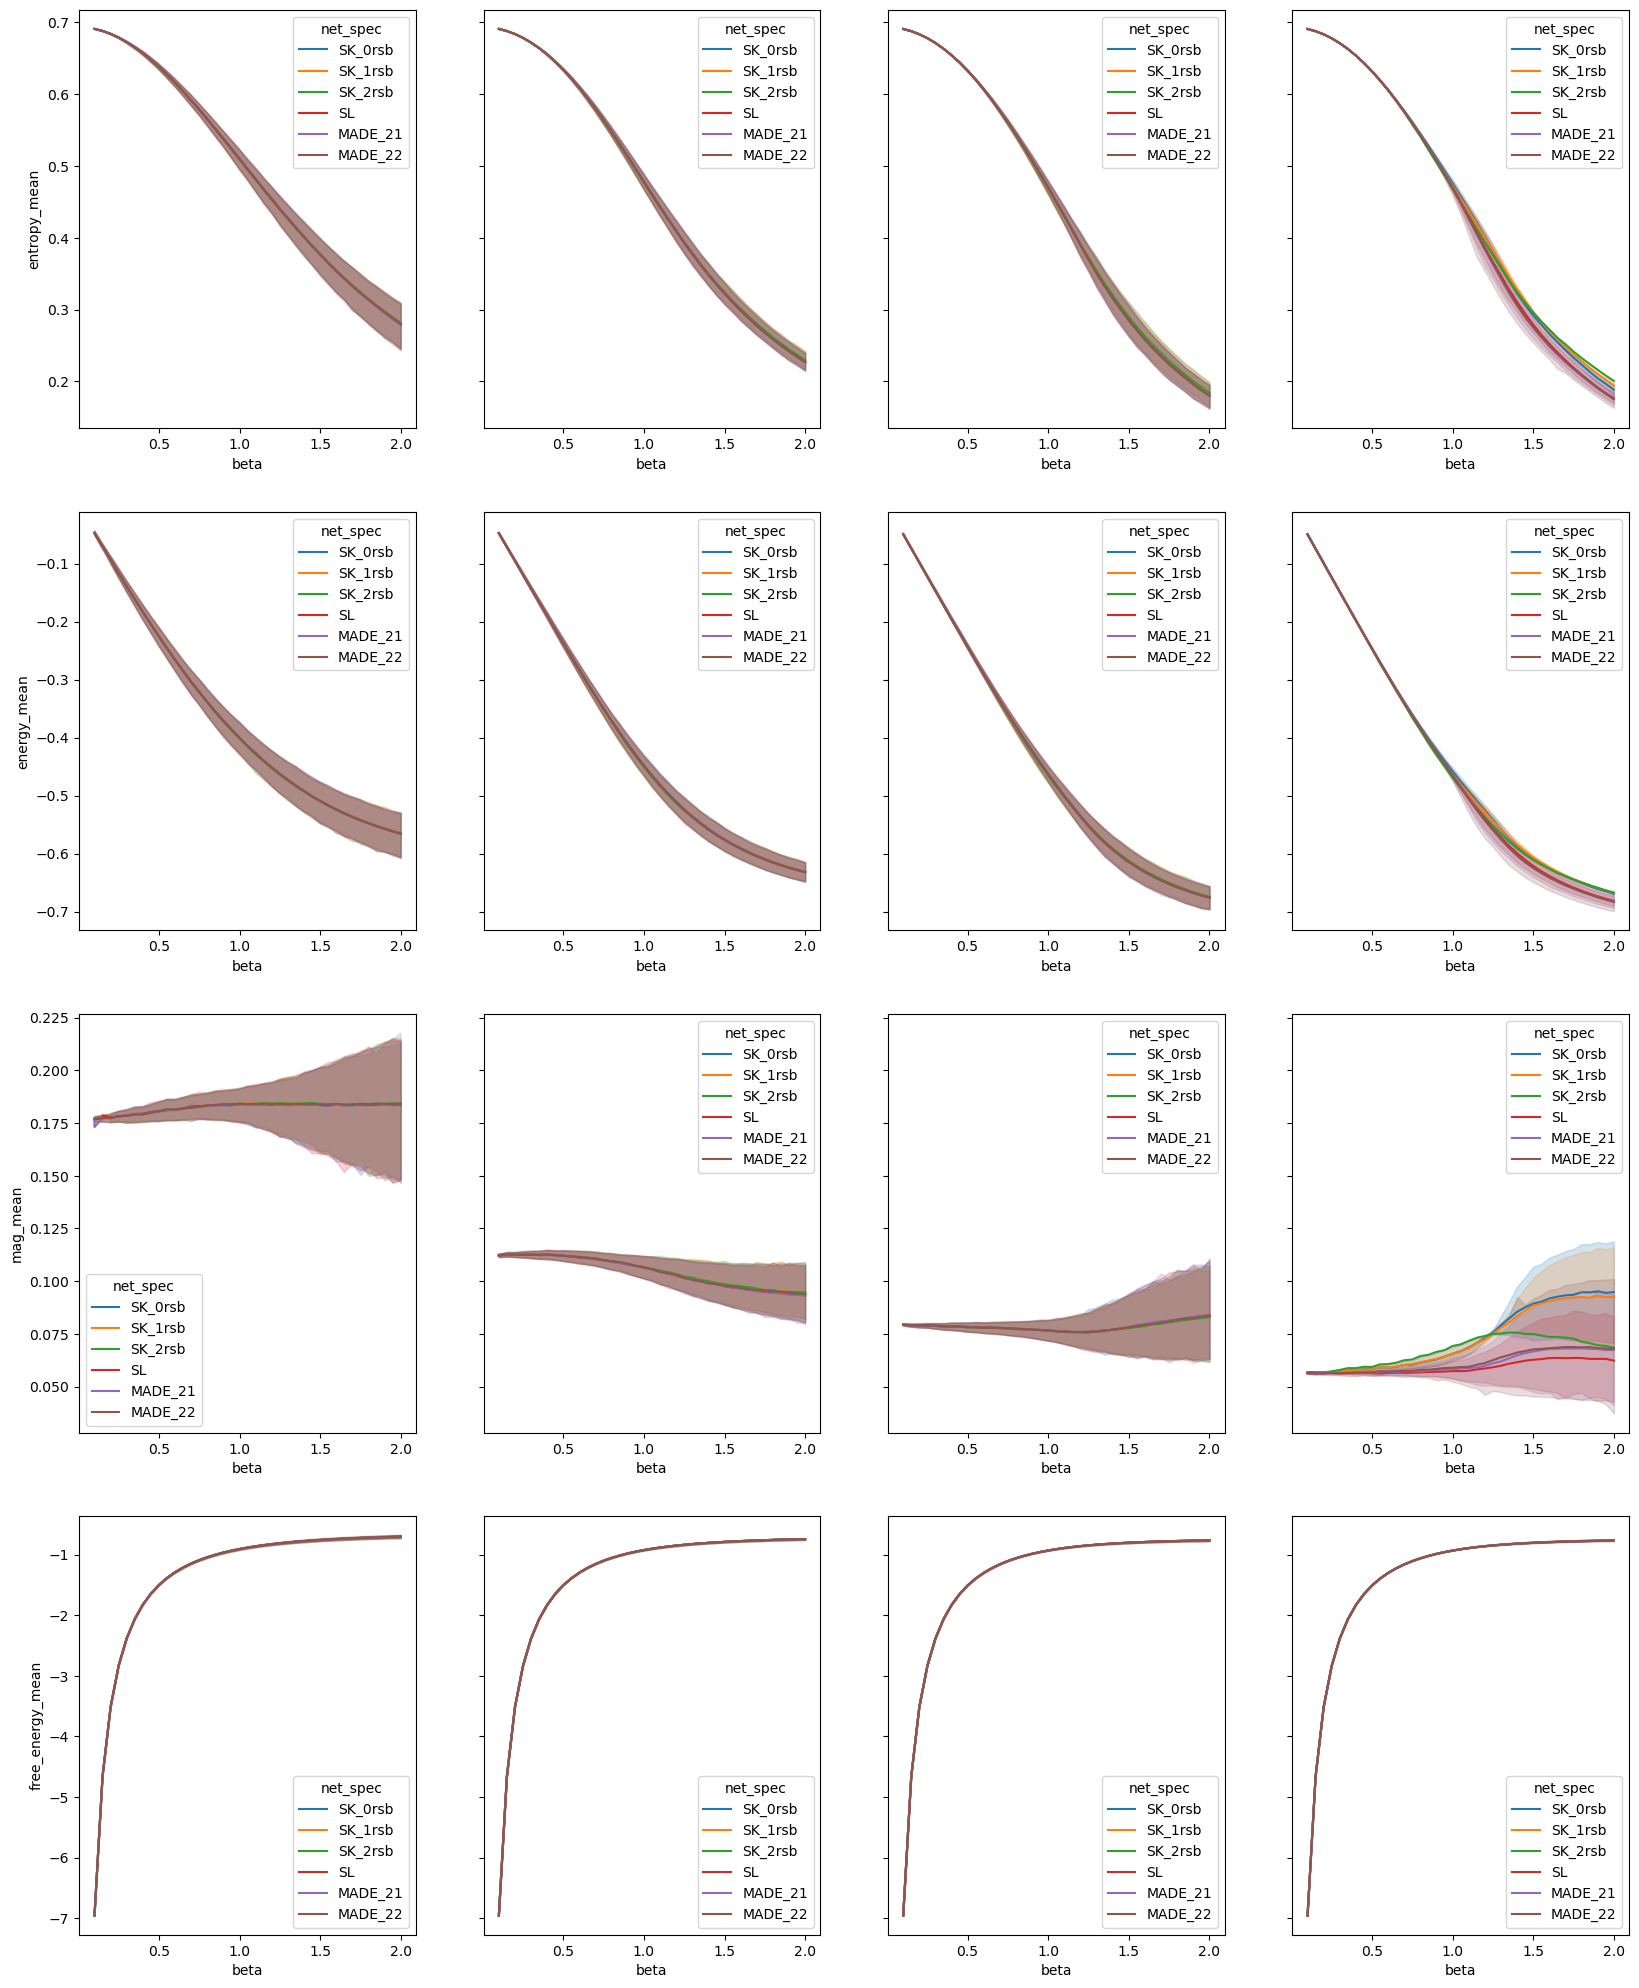

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

Ns=[20, 50, 100, 200]
fig, axs = plt.subplots(4,4, figsize=(20, 25), sharey="row")
# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    sns.lineplot(data=d_, x="beta", y="entropy_mean", hue="net_spec", ax=axs[0][i], legend="full")

# N=10
# sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec", ax=axs[1][0])
for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    sns.lineplot(data=d_, x="beta", y="energy_mean", hue="net_spec", ax=axs[1][i], legend="full")

# N=10
# sns.lineplot(data=data[N], x="beta", y="free_energy_std", hue="net_spec", ax=axs[2][0])
for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    sns.lineplot(data=d_, x="beta", y="mag_mean", hue="net_spec", ax=axs[2][i], legend="full")

for i, N in enumerate(Ns):
    d_ = data[(data["N"] == N)]
    sns.lineplot(data=d_, x="beta", y="free_energy_mean", hue="net_spec", ax=axs[3][i], legend="full")


In [21]:
data.keys()

Index(['beta', 'free_energy_mean', 'free_energy_std', 'entropy_mean',
       'energy_mean', 'mag', 'mag_mean', 'q', 'fe_run', 'fe_std_run',
       'num_params', 'num_train_params', 'save_dir', 'file_name', 'model',
       'save_net', 'net_spec', 'device', 'suffix', 'N', 'seed', 'J', 'h', 'lr',
       'std_fe_limit', 'max_step', 'batch_size', 'batch_iter', 'stats_step',
       'num_threads', 'beta_range', 'err_fe', 'err_fe_rel'],
      dtype='object')

<AxesSubplot:xlabel='N', ylabel='energy_mean'>

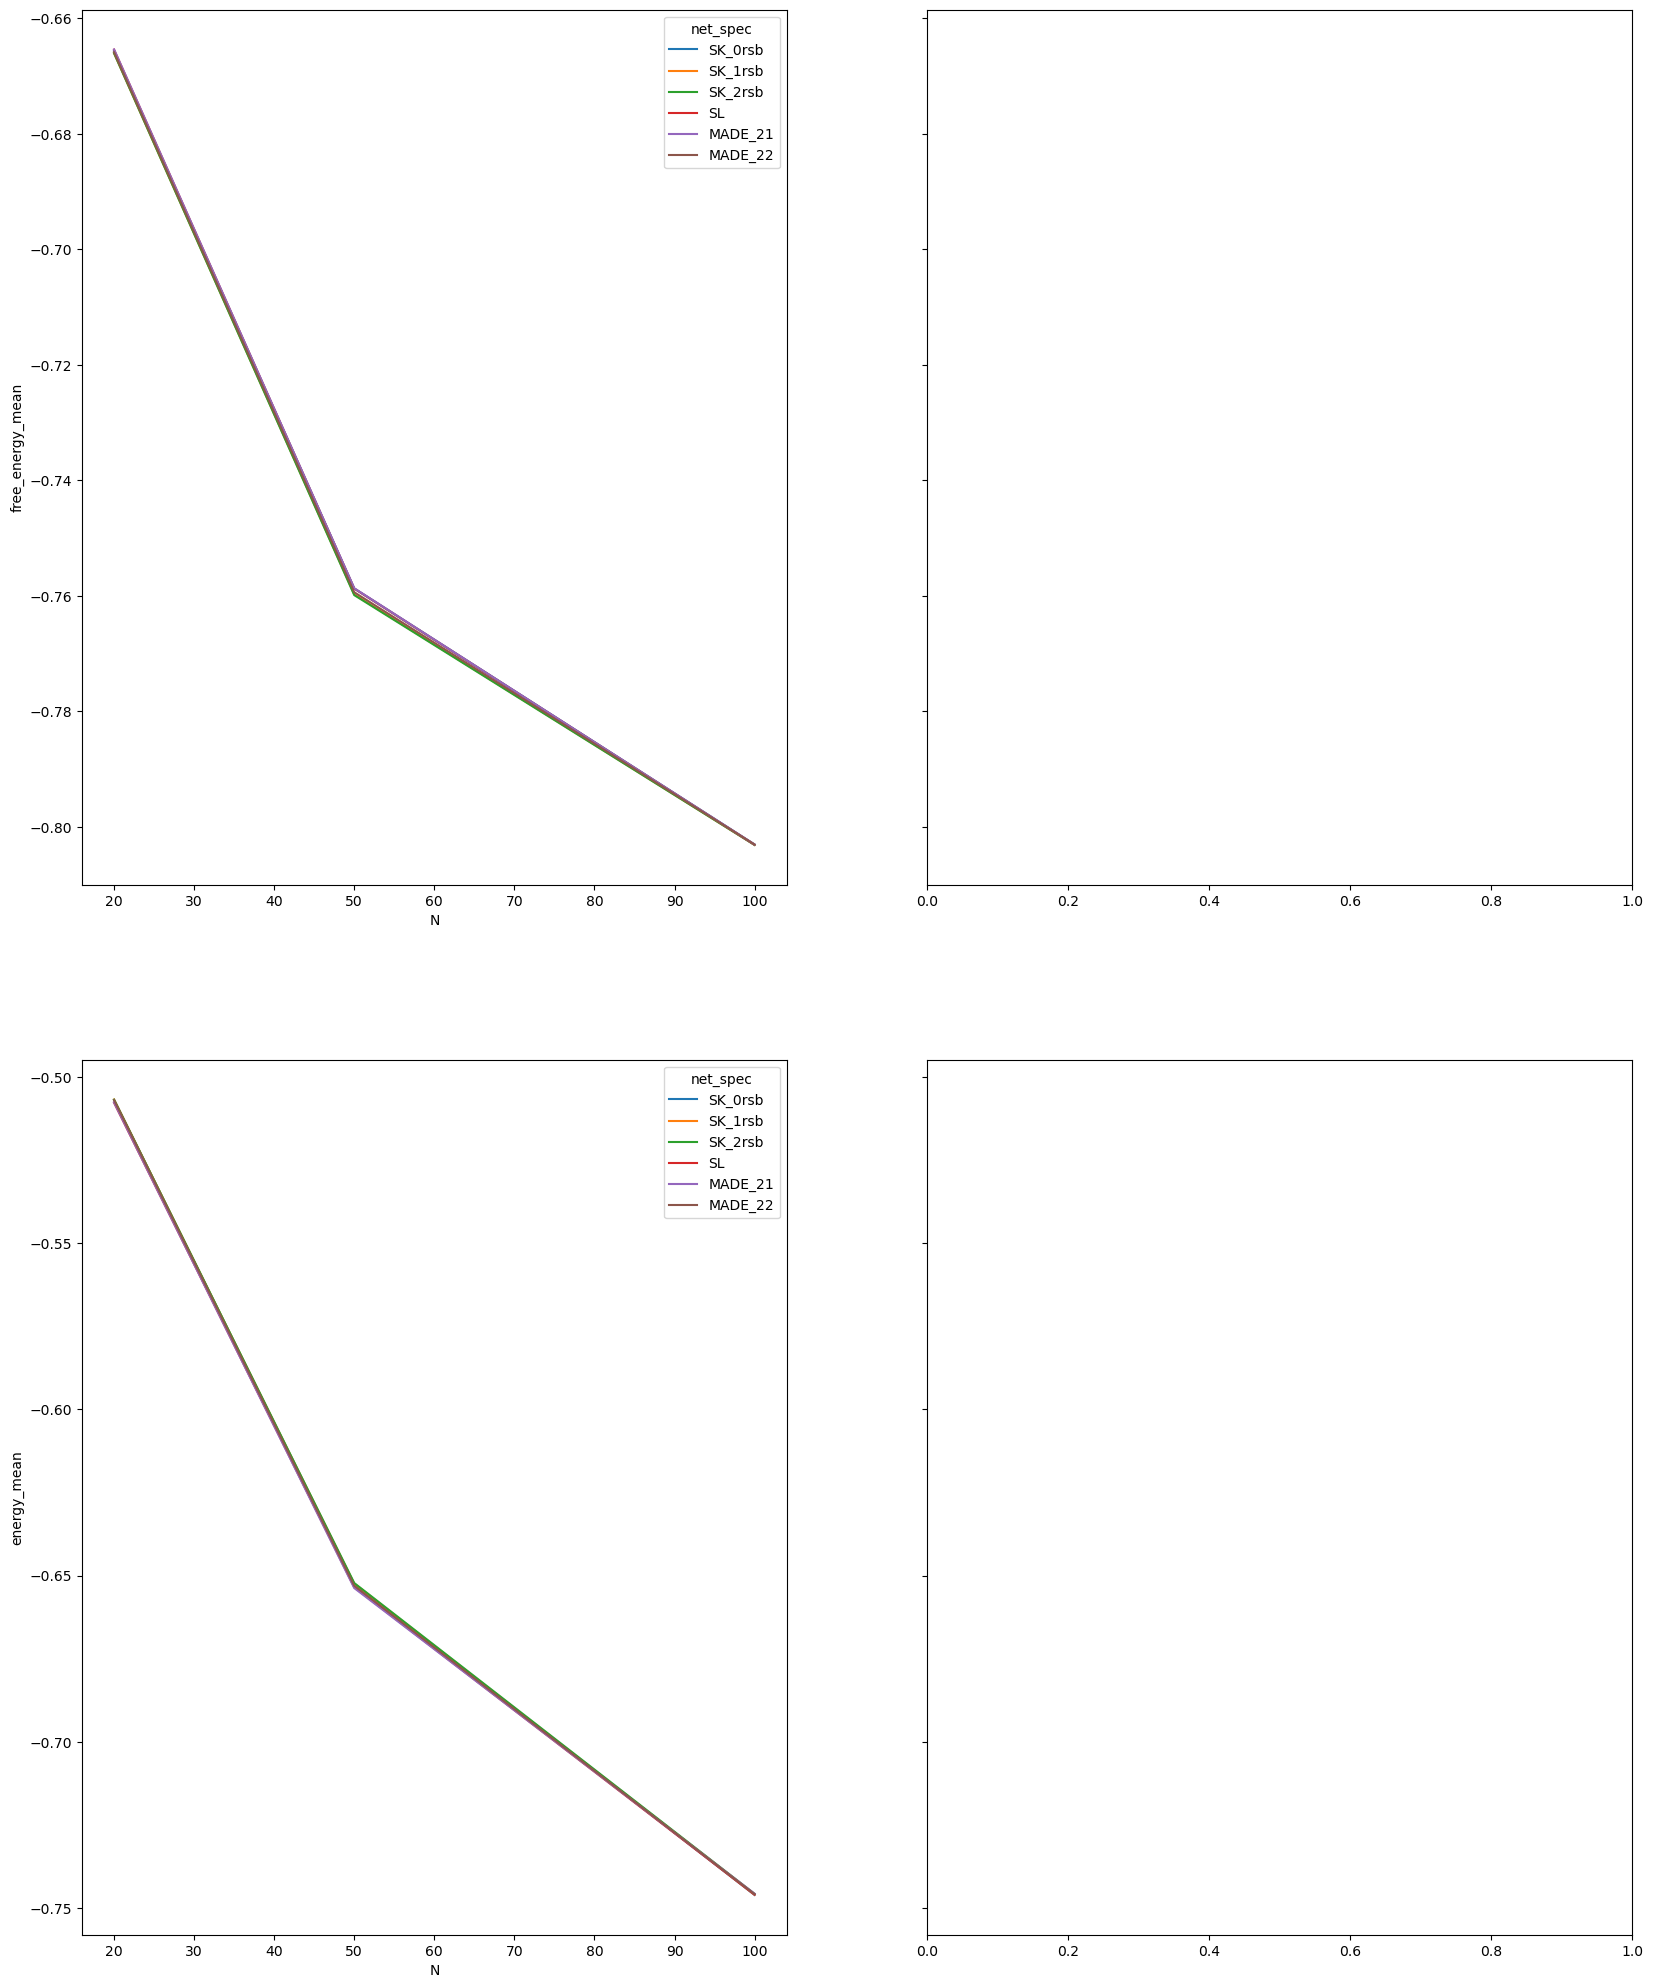

In [23]:
Ns=[20, 50, 100, 200]

fig, axs = plt.subplots(2,2, figsize=(20, 25), sharey="row")
# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
beta_lim = 2
d_ = data[(np.abs(data["beta"] - beta_lim)<1e-6) & (data["seed"] == 1) & (data["N"] < 200)]
sns.lineplot(data=d_, x="N", y="free_energy_mean", hue="net_spec", ax=axs[0][0], legend="full")
sns.lineplot(data=d_, x="N", y="energy_mean", hue="net_spec", ax=axs[1][0], legend="full")


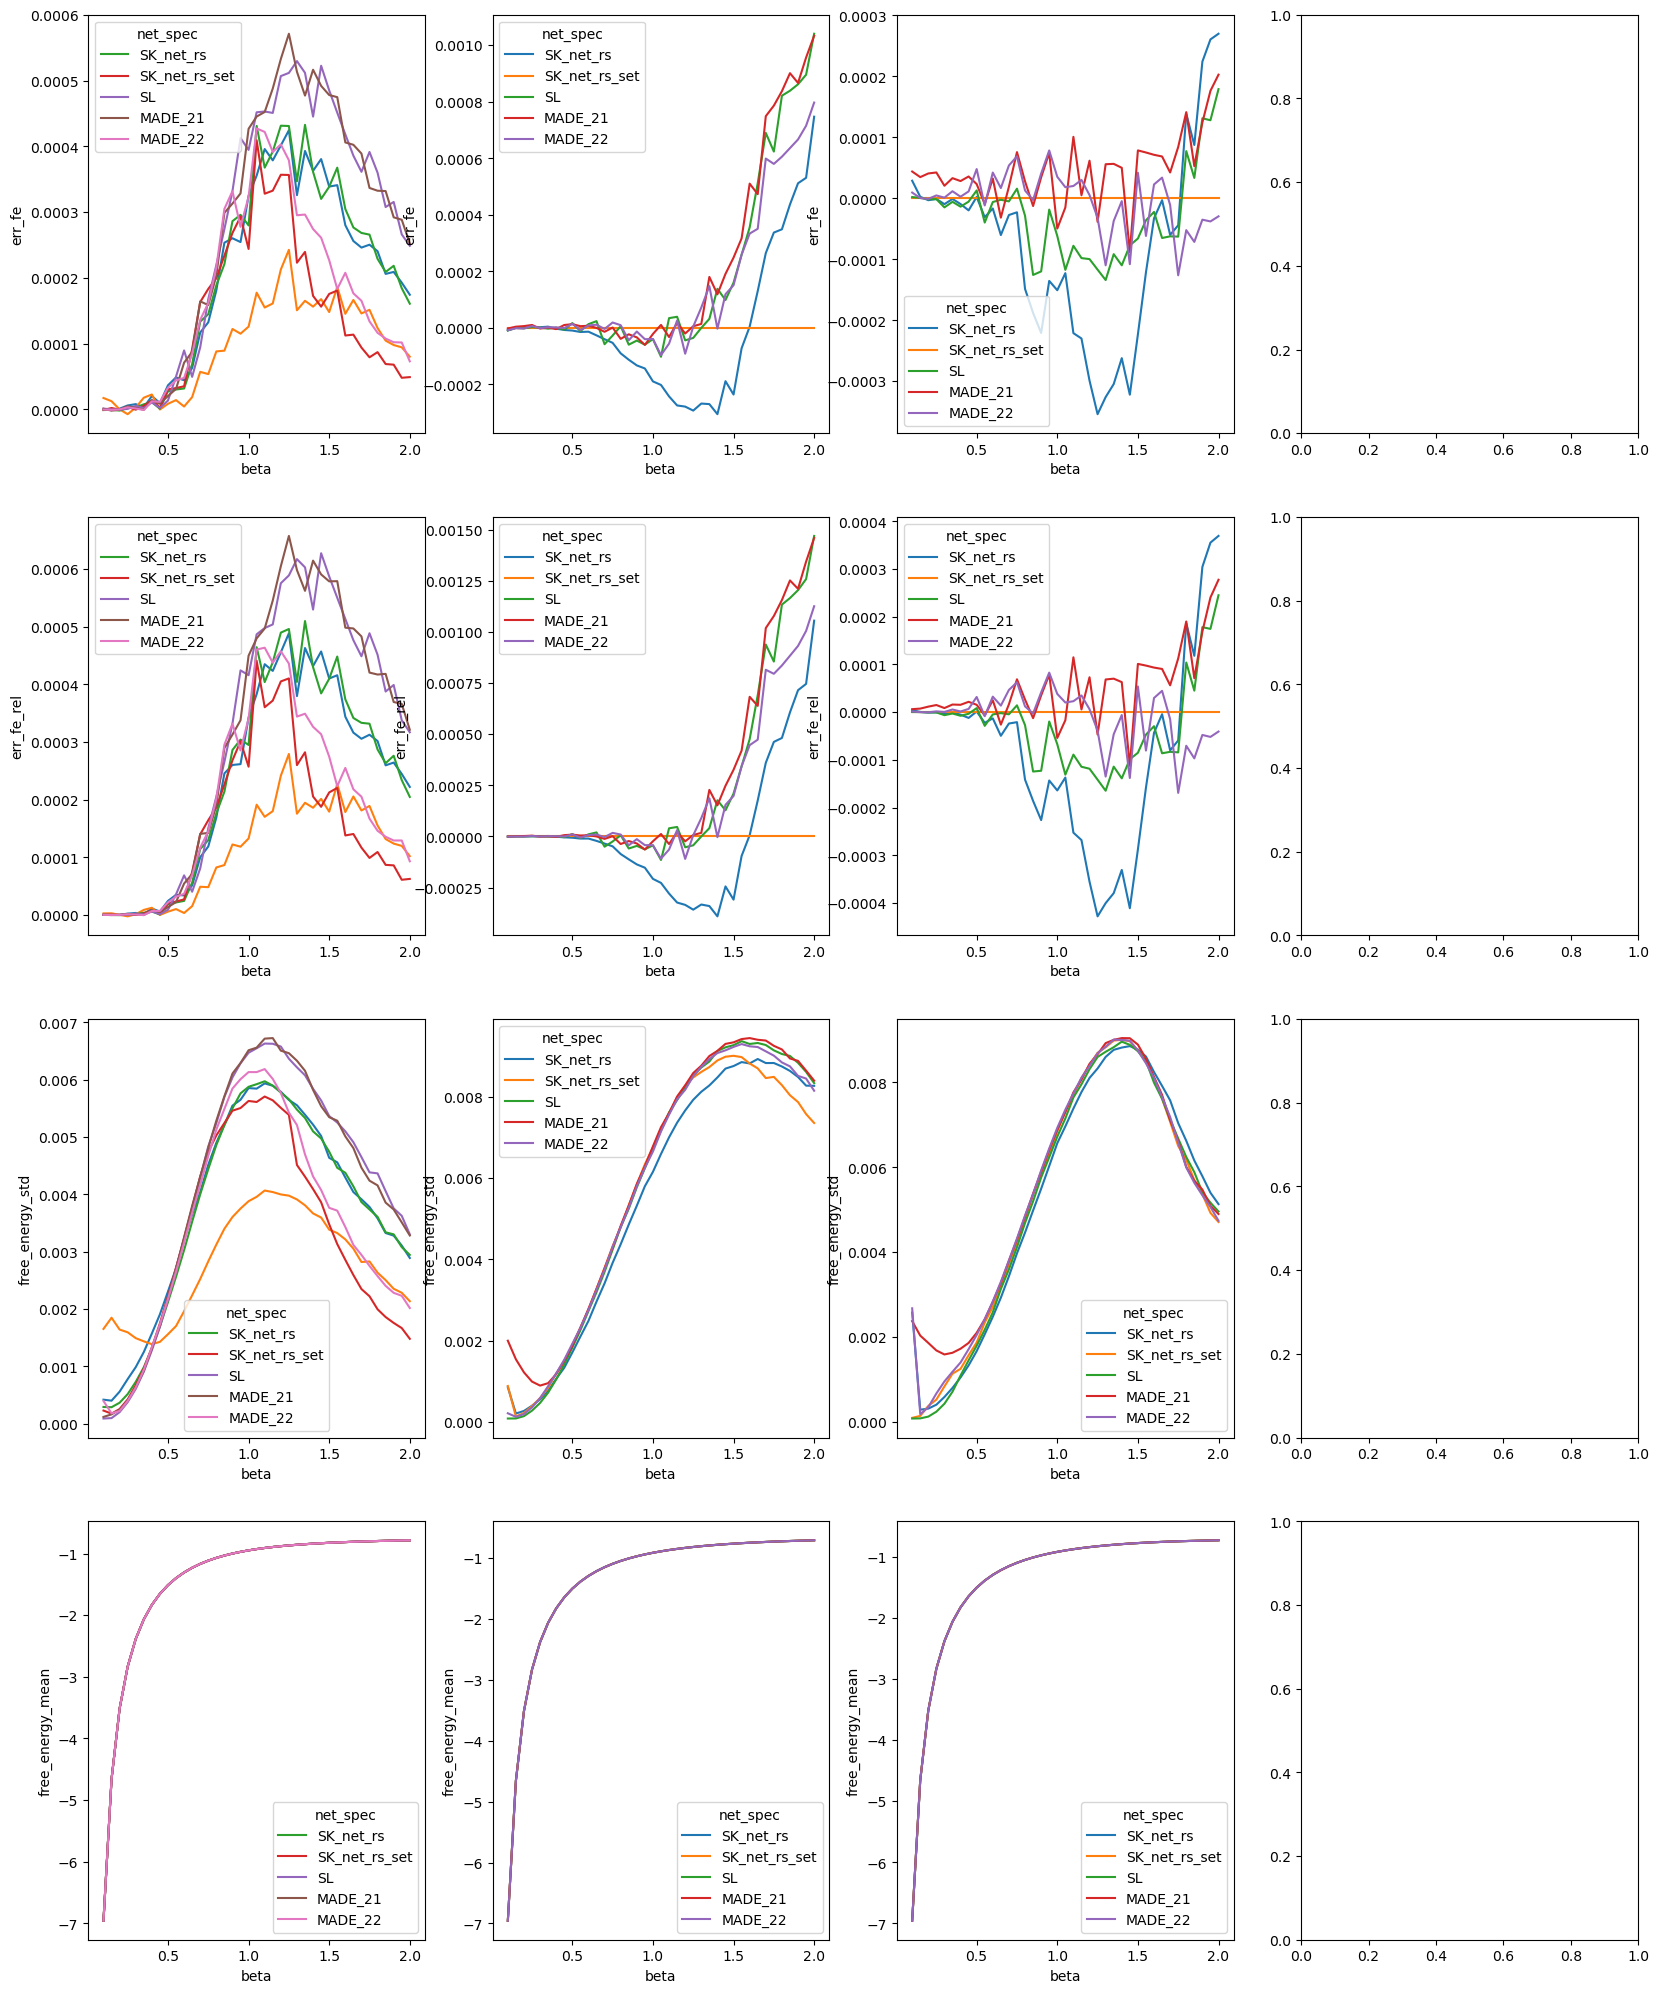

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pl = {}
to_pl = [ "_SK_net_0rs", "_SK_net_1rs","SK_net_rs", "SK_net_rs_set",  "SL", "MADE_21", "MADE_22"]
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

#fig, axs = plt.subplots(4,4, figsize=(20, 25), sharey="row")
fig, axs = plt.subplots(4,4, figsize=(20, 25))
# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
for i, N in enumerate(Ns):
    sns.lineplot(data=data_pl[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][i], legend="full")

# N=10
# sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec", ax=axs[1][0])
for i, N in enumerate(Ns):
    sns.lineplot(data=data_pl[N], x="beta", y="err_fe_rel", hue="net_spec", ax=axs[1][i], legend="full")

# N=10
# sns.lineplot(data=data[N], x="beta", y="free_energy_std", hue="net_spec", ax=axs[2][0])
for i, N in enumerate(Ns):
    sns.lineplot(data=data_pl[N], x="beta", y="free_energy_std", hue="net_spec", ax=axs[2][i], legend="full")
for i, N in enumerate(Ns):
    sns.lineplot(data=data_pl[N], x="beta", y="free_energy_mean", hue="net_spec", ax=axs[3][i], legend="full")


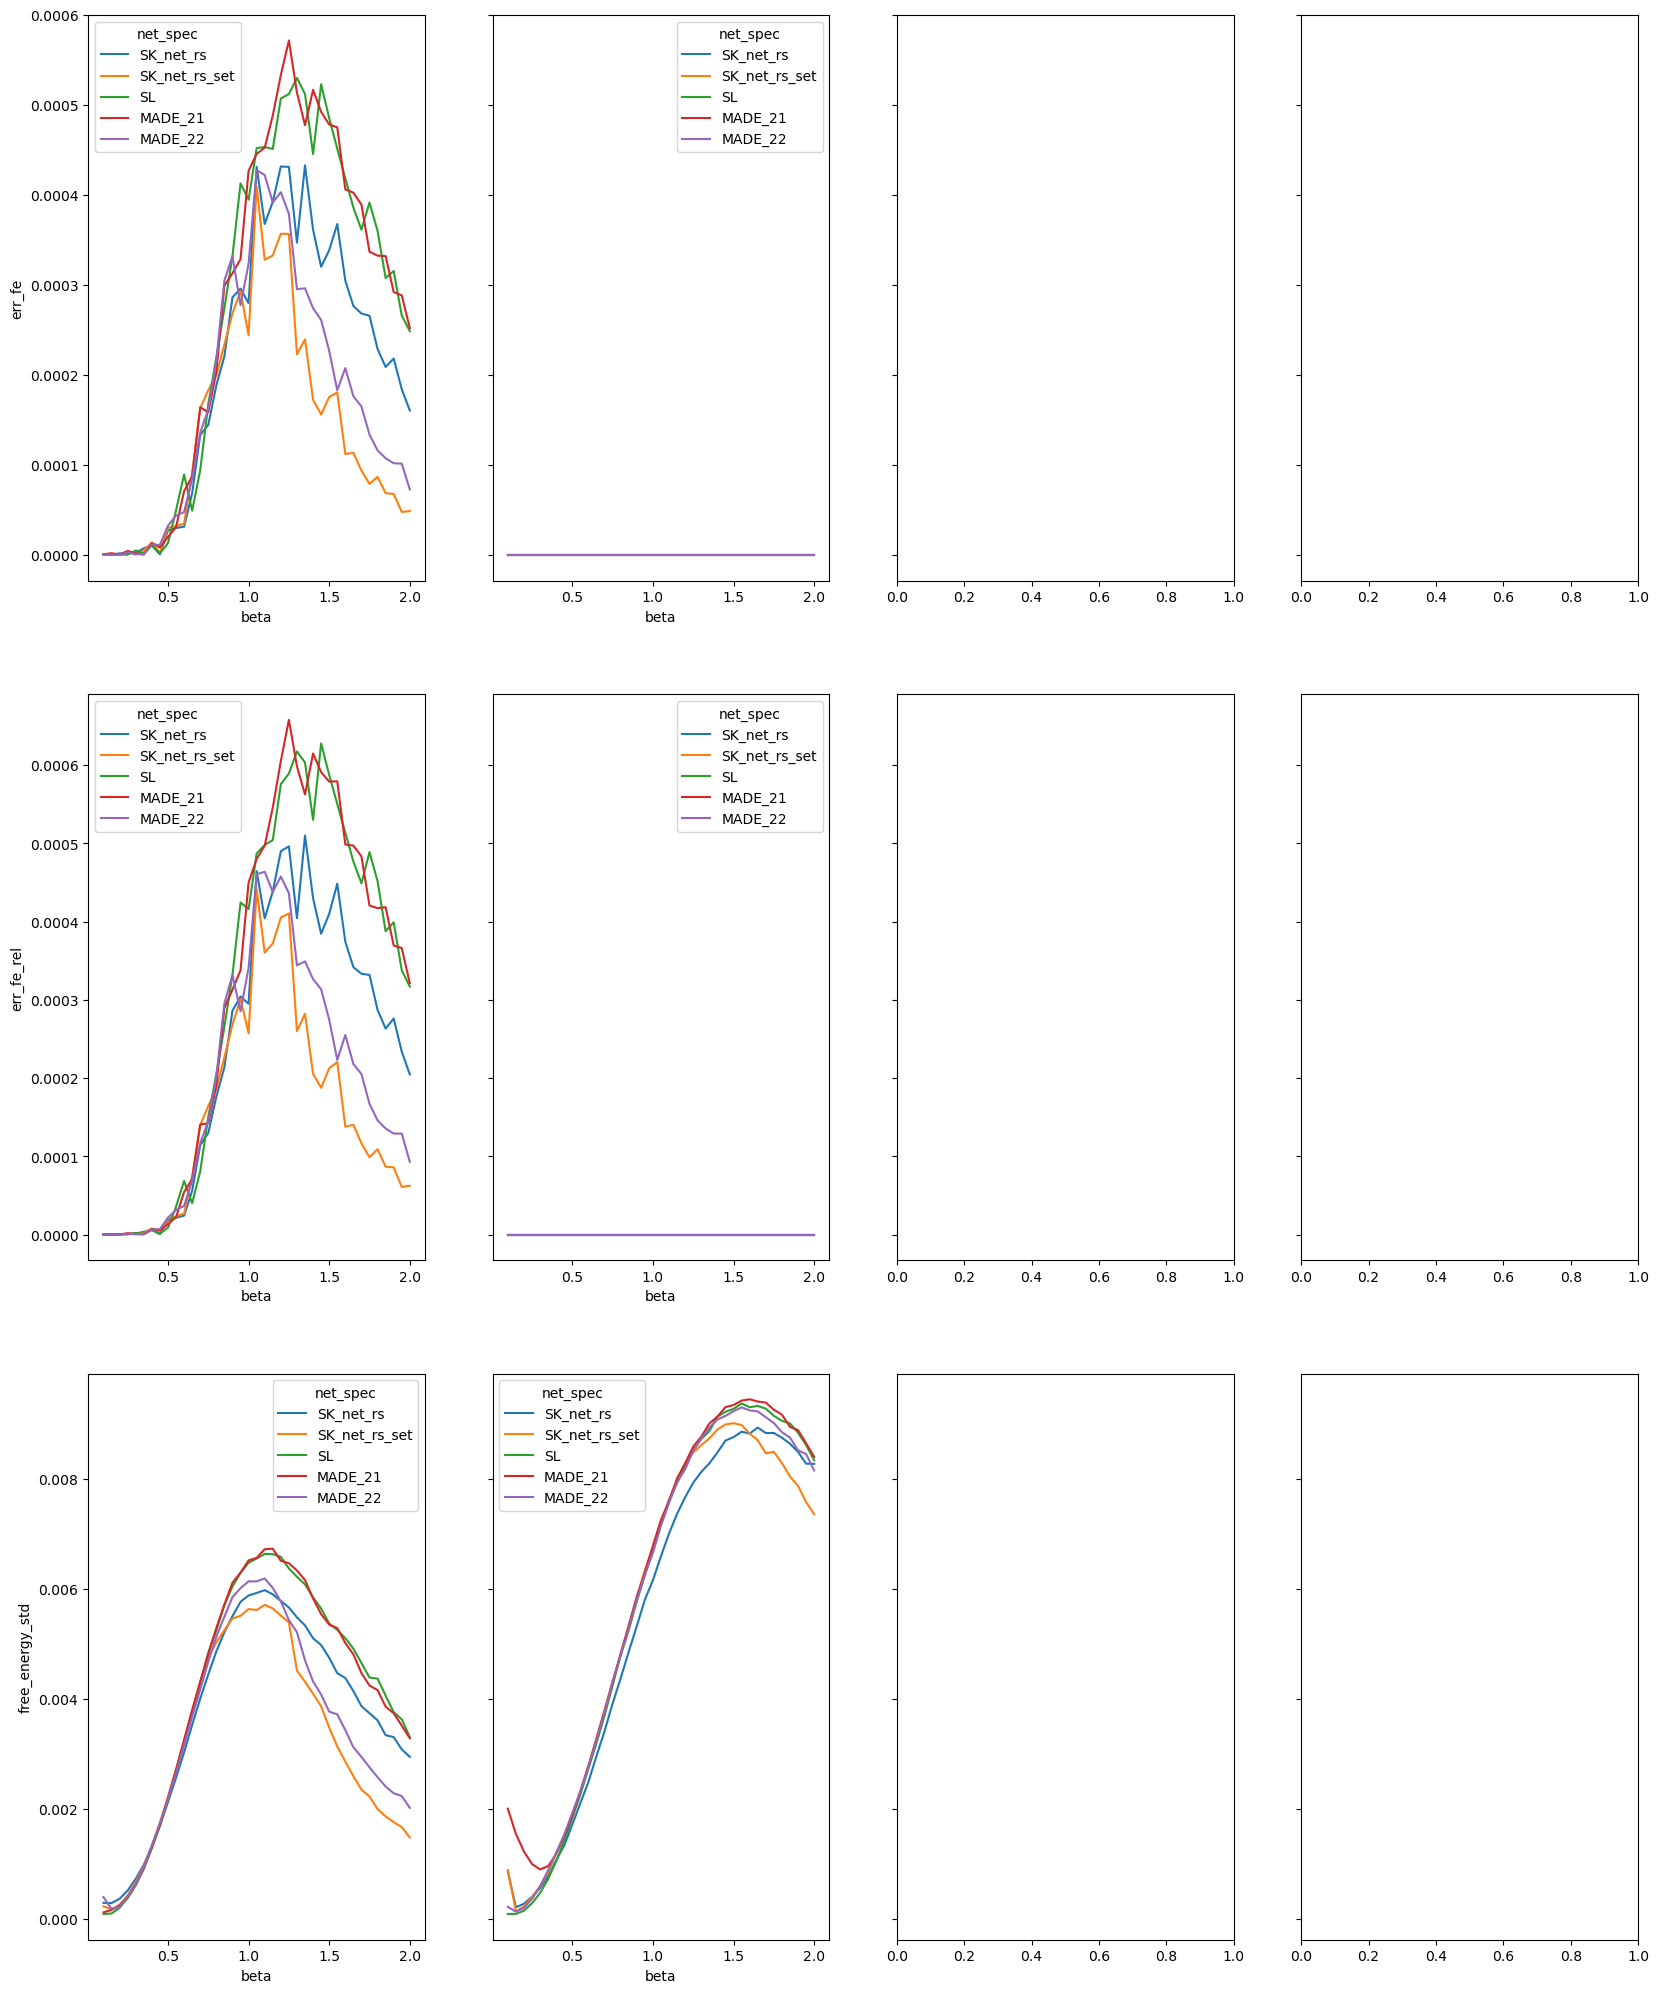

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pl = {}
to_pl = [ "SK_net_rs", "SK_net_rs_set",  "SL", "MADE_21", "MADE_22"]
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

fig, axs = plt.subplots(3,4, figsize=(20, 25), sharey="row")
# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
for i, N in enumerate(Ns):
    sns.lineplot(data=data_pl[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][i])

# N=10
# sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec", ax=axs[1][0])
for i, N in enumerate(Ns):
    sns.lineplot(data=data_pl[N], x="beta", y="err_fe_rel", hue="net_spec", ax=axs[1][i])

# N=10
# sns.lineplot(data=data[N], x="beta", y="free_energy_std", hue="net_spec", ax=axs[2][0])
for i, N in enumerate(Ns):
    sns.lineplot(data=data_pl[N], x="beta", y="free_energy_std", hue="net_spec", ax=axs[2][i])


In [ ]:
data_pl[20]["num_train_params"]

39      20.0
40      20.0
41      20.0
42      20.0
43      20.0
       ...  
346    420.0
347    420.0
348    420.0
349    420.0
350    420.0
Name: num_train_params, Length: 273, dtype: float64

In [12]:
all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])

In [41]:
axs[0]

[]

In [39]:
gs00[0,0]

GridSpecFromSubplotSpec(1, 3)[0:1, 0:1]

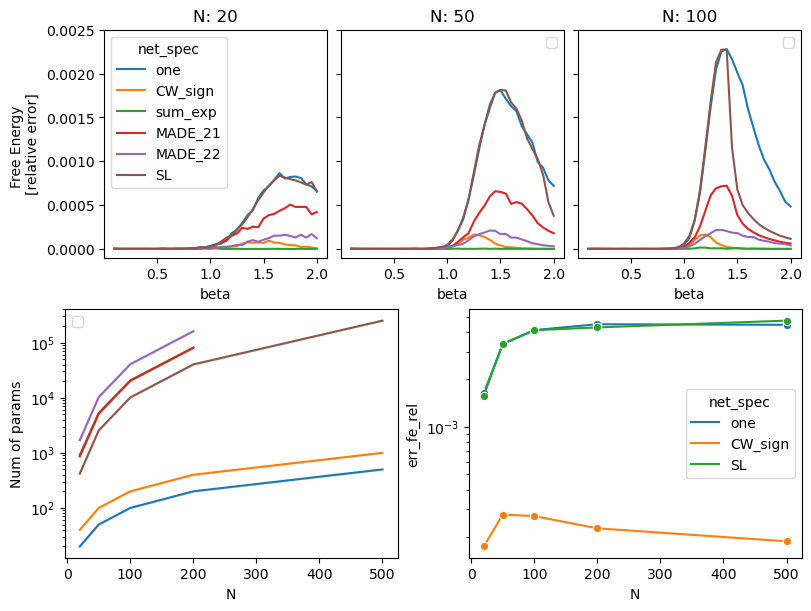

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pl = {}
to_pl = ['one', 'CW_sign', 'sum_exp', 'MADE_21', 'MADE_22', 'SL']
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
all_N["N"]=pd.to_numeric(all_N["N"])

fig = plt.figure(constrained_layout=True, figsize=(8, 6))
gs = fig.add_gridspec(2, 1)

gs00 = gs[0].subgridspec(1, 3)
gs01 = gs[1].subgridspec(1, 2)

axs = [[], []]
axs[0].append(fig.add_subplot(gs00[0,0]))
axs[0].append(fig.add_subplot(gs00[0,1]))
axs[0].append(fig.add_subplot(gs00[0,2]))
axs[1].append(fig.add_subplot(gs01[0,0]))
axs[1].append(fig.add_subplot(gs01[0,1]))

# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
N=20
sns.lineplot(data=data_pl[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
N=50
sns.lineplot(data=data_pl[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][1])
N=100
sns.lineplot(data=data_pl[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][2])
axs[0][0].set_ylim(-0.0001, 0.0025)
axs[0][1].set_ylim(-0.0001, 0.0025)
axs[0][2].set_ylim(-0.0001, 0.0025)
axs[0][0].set_title(f"N: 20")
axs[0][1].set_title(f"N: 50")
axs[0][2].set_title(f"N: 100")
axs[0][1].set_yticklabels([])
axs[0][2].set_yticklabels([])
axs[0][2].set_ylabel("")
axs[0][1].set_ylabel("")
axs[0][0].set_ylabel("Free Energy \n[relative error]")
axs[1][0].set_ylabel("Num of params")
sns.lineplot(data=all_N, x="N", y="num_train_params", hue="net_spec", ax=axs[1][0])
axs[0][2].legend("")
axs[0][1].legend("")
axs[1][0].legend("")
data_pl = {}
to_pl = ['one', 'CW_sign', 'SL']
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
all_N["N"]=pd.to_numeric(all_N["N"])
sns.lineplot(data=all_N, x="N", y="err_fe_rel", hue="net_spec", ax=axs[1][1], estimator=np.max, errorbar=None, marker="o")

axs[1][0].set_yscale("log")
axs[1][1].set_yscale("log")
#plt.tight_layout()

<AxesSubplot:xlabel='beta', ylabel='err_fe_rel'>

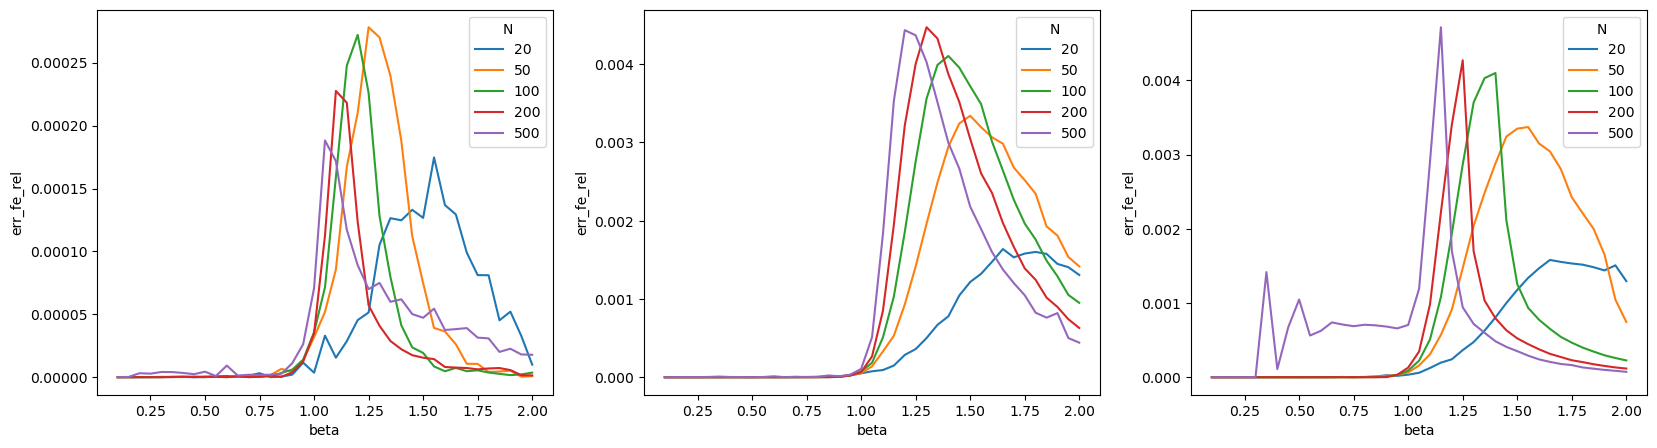

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pl = {}
to_pl = ['one', 'CW_sign', 'SL']
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
#fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
fig, axs = plt.subplots(1,3, figsize=(20, 5))

sns.lineplot(data=all_N[all_N["net_spec"] == 'CW_sign'], x="beta", y="err_fe_rel", hue="N", ax=axs[0])
sns.lineplot(data=all_N[all_N["net_spec"] == 'one'], x="beta", y="err_fe_rel", hue="N", ax=axs[1])
sns.lineplot(data=all_N[all_N["net_spec"] == 'SL'], x="beta", y="err_fe_rel", hue="N", ax=axs[2])


<AxesSubplot:xlabel='beta', ylabel='err_fe_rel'>

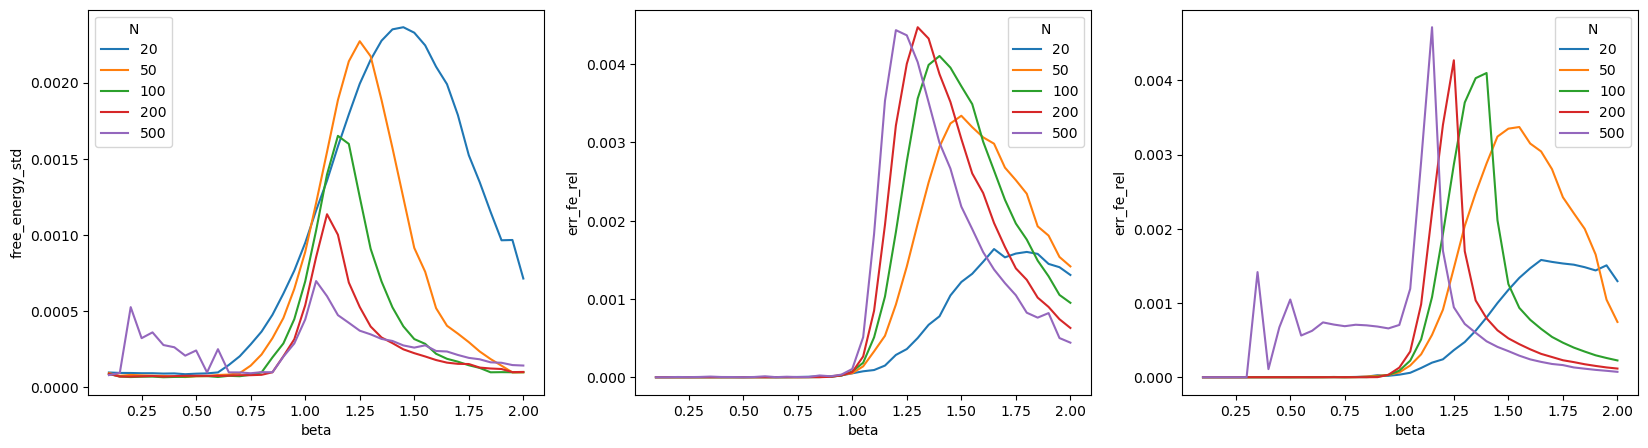

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pl = {}
to_pl = ['one', 'CW_sign', 'SL']
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
#fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
fig, axs = plt.subplots(1,3, figsize=(20, 5))

sns.lineplot(data=all_N[all_N["net_spec"] == 'CW_sign'], x="beta", y="free_energy_std", hue="N", ax=axs[0])
sns.lineplot(data=all_N[all_N["net_spec"] == 'one'], x="beta", y="err_fe_rel", hue="N", ax=axs[1])
sns.lineplot(data=all_N[all_N["net_spec"] == 'SL'], x="beta", y="err_fe_rel", hue="N", ax=axs[2])


In [ ]:
import seaborn as sns
N=20
sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec")

ValueError: Could not interpret value `err_fe_rel` for parameter `y`

<AxesSubplot:xlabel='beta', ylabel='err_fe_rel'>

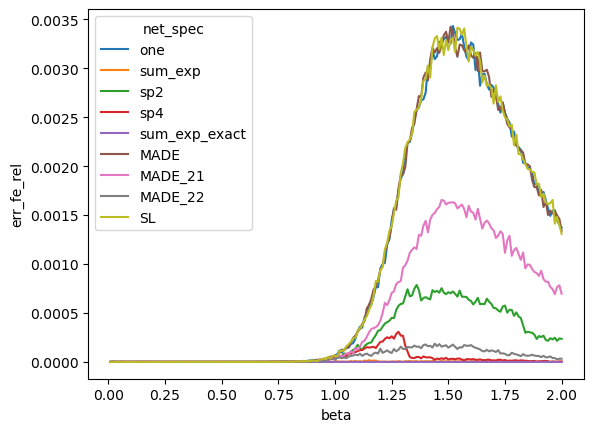

In [56]:
import seaborn as sns
N=50
sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec")

<AxesSubplot:xlabel='beta', ylabel='err_fe_rel'>

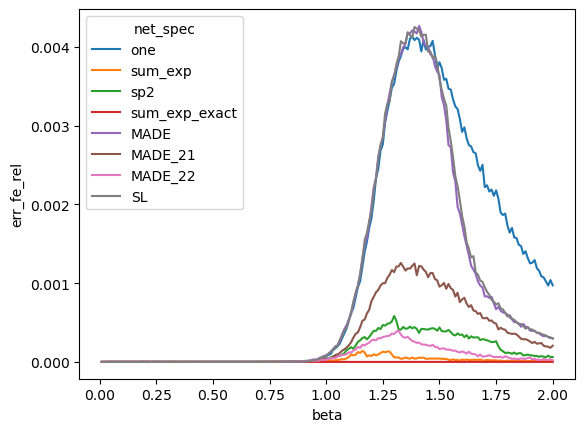

In [57]:
import seaborn as sns
N=100
sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec")

In [28]:
data[10]

beta  free_energy  free_energy_std  mag_mean                   save_dir  \
0     0.01   -69.314944         0.000000  0.248303  results/Curie-Weiss/data/   
1     0.02   -34.657814         0.000000  0.249551  results/Curie-Weiss/data/   
2     0.03   -23.105592         0.000000  0.250815  results/Curie-Weiss/data/   
3     0.04   -17.329599         0.000000  0.252093  results/Curie-Weiss/data/   
4     0.05   -13.864099         0.000000  0.253388  results/Curie-Weiss/data/   
...    ...          ...              ...       ...                        ...   
1995  1.96          NaN         0.004807  0.905210  results/Curie-Weiss/data/   
1996  1.97          NaN         0.004841  0.906230  results/Curie-Weiss/data/   
1997  1.98          NaN         0.004791  0.908950  results/Curie-Weiss/data/   
1998  1.99          NaN         0.004764  0.911640  results/Curie-Weiss/data/   
1999  2.00          NaN         0.004838  0.911740  results/Curie-Weiss/data/   

     file_name model net_spec device suffix  ... batch_iter stats_step  \
0         data    CW    exact    cpu   None  ...         20          1   
1         data    CW    exact    cpu   None  ...         20          1   
2         data    CW    exact    cpu   None  ...         20          1   
3         data    CW    exact    cpu   None  ...         20          1   
4         data    CW    exact    cpu   None  ...         20          1   
...        ...   ...      ...    ...    ...  ...        ...        ...   
1995      data    CW       SL    cpu   None  ...         20          1   
1996      data    CW       SL    cpu   None  ...         20          1   
1997      data    CW       SL    cpu   None  ...         20          1   
1998      data    CW       SL    cpu   None  ...         20          1   
1999      data    CW       SL    cpu   None  ...         20          1   

     num_threads          beta_range free_energy_mean entropy_mean  \
0              1  [0.01, 2.0, 200.0]              NaN          NaN   
1              1  [0.01, 2.0, 200.0]              NaN          NaN   
2              1  [0.01, 2.0, 200.0]              NaN          NaN   
3              1  [0.01, 2.0, 200.0]              NaN          NaN   
4              1  [0.01, 2.0, 200.0]              NaN          NaN   
...          ...                 ...              ...          ...   
1995           1  [0.01, 2.0, 200.0]        -0.503581     0.248837   
1996           1  [0.01, 2.0, 200.0]        -0.502903     0.247070   
1997           1  [0.01, 2.0, 200.0]        -0.502332     0.243766   
1998           1  [0.01, 2.0, 200.0]        -0.501678     0.239506   
1999           1  [0.01, 2.0, 200.0]        -0.501082     0.238949   

     energy_mean      mag num_params num_train_params  
0            NaN      NaN        NaN              NaN  
1            NaN      NaN        NaN              NaN  
2            NaN      NaN        NaN              NaN  
3            NaN      NaN        NaN              NaN  
4            NaN      NaN        NaN              NaN  
...          ...      ...        ...              ...  
1995   -0.376623  0.00589      110.0            110.0  
1996   -0.377487 -0.00239      110.0            110.0  
1997   -0.379218 -0.00315      110.0            110.0  
1998   -0.381323 -0.00228      110.0            110.0  
1999   -0.381608  0.00364      110.0            110.0  

[2000 rows x 27 columns]

In [20]:
N=20
batch_size=2000
std_fe_limit=1e-4
lr=0.001
data[f"CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}"] = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

N=50
batch_size=2000
std_fe_limit=1e-4
lr=0.001
data[f"CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}"] = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

N=50
batch_size=2000
std_fe_limit=1e-4
lr=0.0005
data[f"CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}"] = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

N=100
batch_size=2000
std_fe_limit=1e-4
lr=0.001
data[f"CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}"] = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")


In [21]:
data.keys()

dict_keys(['CW_N20_bs2000_fe_lim0.0001_lr0.001', 'CW_N50_bs2000_fe_lim0.0001_lr0.001', 'CW_N50_bs2000_fe_lim0.0001_lr0.0005', 'CW_N100_bs2000_fe_lim0.0001_lr0.001'])

<AxesSubplot:xlabel='beta'>

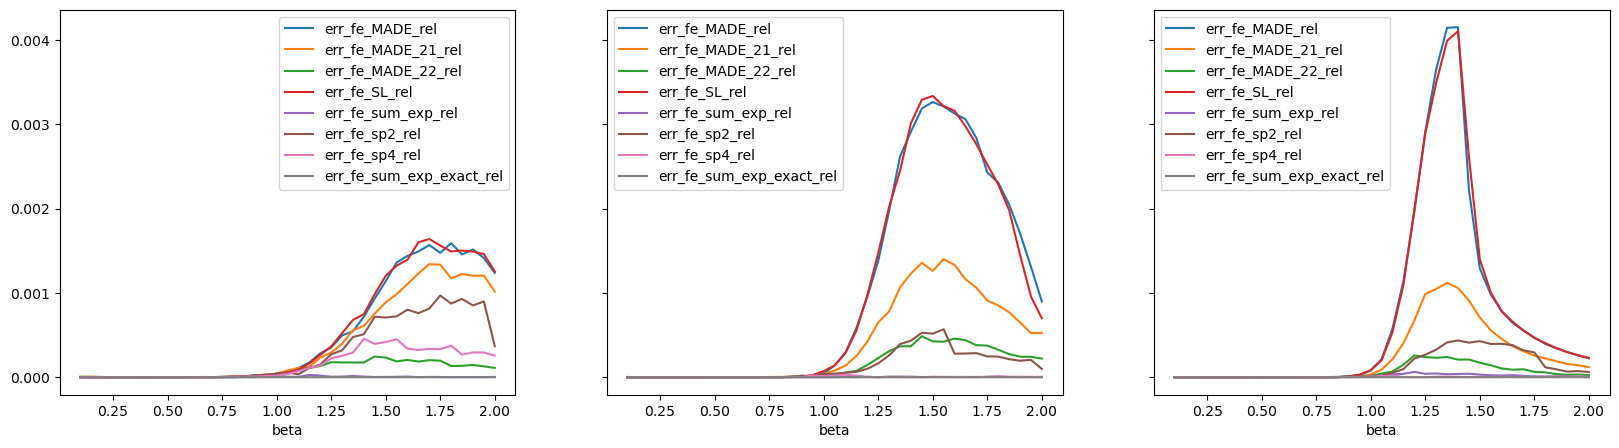

In [22]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,3, figsize=(20,5), sharey=True)
data

name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
namess=[f"err_fe{x}_rel" for x in name_nets]
#namess.append("free_energy_std")
data['CW_N20_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[0])
data['CW_N50_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[1])
data['CW_N100_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[2])

<AxesSubplot:xlabel='beta'>

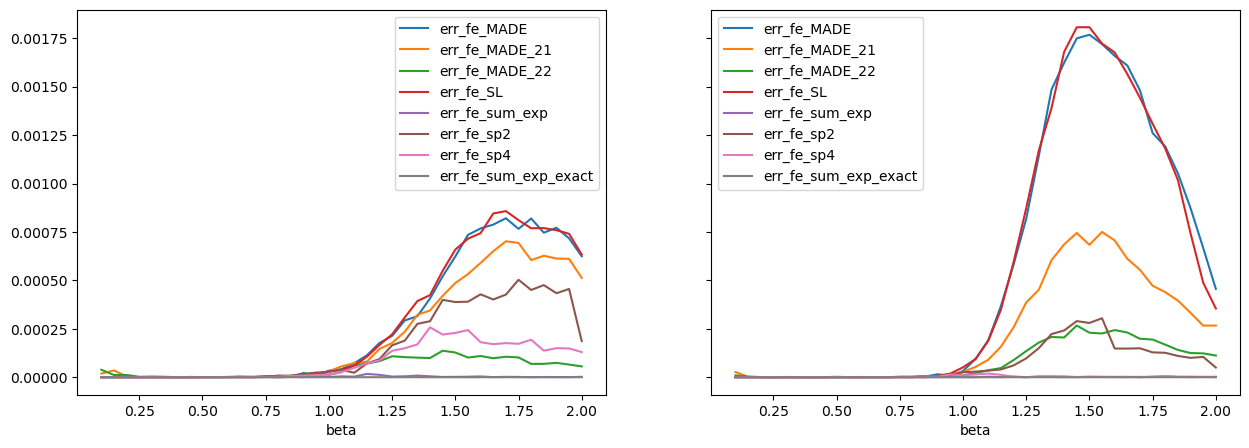

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(15,5), sharey=True)
data

name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
namess=[f"err_fe{x}" for x in name_nets]
#namess.append("free_energy_std")
data['CW_N20_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[0])
data['CW_N50_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[1])

# Curie Weiss

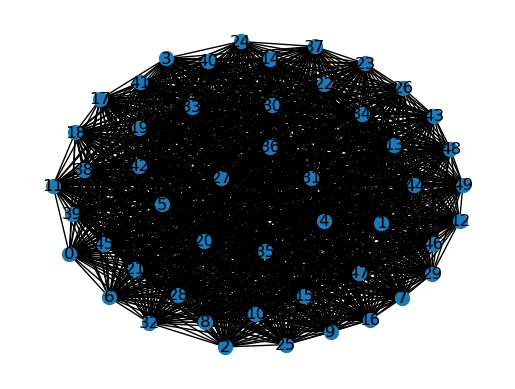

In [3]:
import importlib
import matplotlib.pyplot as plt

N = 50
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)
JJ=1
J_val = JJ/(2*N)
J = J_val * J_interaction

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

# Exact solutions
enumerating all configurations.
Th. results

In [4]:
from python_lib.models import spins_model
import python_lib.models
importlib.reload(spins_model)
from python_lib.models import spins_model

device="cpu"
#device="mps"
CW_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=2

beta_init = 0.1
step = 0.05
betas = np.arange(beta_init, beta_fin+step, step)

In [5]:
from python_lib.models import spins_model
importlib.reload(spins_model)

CW_model_exact = spins_model.KW_exact_fast(N, H, J, J_interaction, device="cpu")
f_exact = []
f_exact_infN = []
for beta_ in betas:
    f_exact.append(CW_model_exact.exact(beta_))
    f_exact_infN.append(CW_model_exact.exact_infN(beta_))

In [6]:
f_exact_infN[0]

{'beta': 0.1,
 'free_energy': -6.931021827284194,
 'free_energy_std': 0,
 'mag_mean': 0.009999666456504392}

In [7]:
CW_model_exact.H[0].item()

0.0

In [8]:
data_exact = pd.DataFrame(f_exact)
f_exact_infN_pd = pd.DataFrame(f_exact_infN)
f_exact_infN_pd = f_exact_infN_pd.add_suffix("_inf")


In [9]:
data = data_exact
data = pd.concat([data, f_exact_infN_pd], axis = 1)


In [10]:
data

beta  free_energy  free_energy_std  mag_mean  beta_inf  free_energy_inf  \
0   0.10    -6.931996                0  0.118328      0.10        -6.931022   
1   0.15    -4.621795                0  0.121727      0.15        -4.620344   
2   0.20    -3.466862                0  0.125422      0.20        -3.464936   
3   0.25    -2.774052                0  0.129456      0.25        -2.771651   
4   0.30    -2.312320                0  0.133882      0.30        -2.309441   
5   0.35    -1.982648                0  0.138765      0.35        -1.979284   
6   0.40    -1.735531                0  0.144186      0.40        -1.731669   
7   0.45    -1.543469                0  0.150243      0.45        -1.539090   
8   0.50    -1.389967                0  0.157061      0.50        -1.385045   
9   0.55    -1.264532                0  0.164800      0.55        -1.259031   
10  0.60    -1.160174                0  0.173664      0.60        -1.154046   
11  0.65    -1.072061                0  0.183917      0.65        -1.065244   
12  0.70    -0.996751                0  0.195905      0.70        -0.989161   
13  0.75    -0.931731                0  0.210079      0.75        -0.923259   
14  0.80    -0.875130                0  0.227031      0.80        -0.865633   
15  0.85    -0.825537                0  0.247526      0.85        -0.814828   
16  0.90    -0.781879                0  0.272528      0.90        -0.769710   
17  0.95    -0.743339                0  0.303174      0.95        -0.729385   
18  1.00    -0.709300                0  0.340663      1.00        -0.693139   
19  1.05    -0.679302                0  0.385943      1.05        -0.661824   
20  1.10    -0.653001                0  0.439169      1.10        -0.636215   
21  1.15    -0.630127                0  0.499032      1.15        -0.615143   
22  1.20    -0.610433                0  0.562412      1.20        -0.597706   
23  1.25    -0.593651                0  0.624917      1.25        -0.583200   
24  1.30    -0.579468                0  0.682308      1.30        -0.571075   
25  1.35    -0.567536                0  0.731915      1.35        -0.560896   
26  1.40    -0.557502                0  0.773067      1.40        -0.552316   
27  1.45    -0.549044                0  0.806542      1.45        -0.545057   
28  1.50    -0.541882                0  0.833715      1.50        -0.538894   
29  1.55    -0.535789                0  0.855966      1.55        -0.533646   
30  1.60    -0.530582                0  0.874427      1.60        -0.529164   
31  1.65    -0.526113                0  0.889946      1.65        -0.525326   
32  1.70    -0.522261                0  0.903142      1.70        -0.522030   
33  1.75    -0.518932                0  0.914465      1.75        -0.519194   
34  1.80    -0.516043                0  0.924252      1.80        -0.516748   
35  1.85    -0.513530                0  0.932761      1.85        -0.514634   
36  1.90    -0.511338                0  0.940193      1.90        -0.512803   
37  1.95    -0.509420                0  0.946710      1.95        -0.511215   
38  2.00    -0.507739                0  0.952442      2.00        -0.509836   

    free_energy_std_inf  mag_mean_inf  
0                     0      0.010000  
1                     0      0.014999  
2                     0      0.019997  
3                     0      0.024995  
4                     0      0.029991  
5                     0      0.034986  
6                     0      0.039979  
7                     0      0.044970  
8                     0      0.049958  
9                     0      0.054945  
10                    0      0.059928  
11                    0      0.064909  
12                    0      0.069886  
13                    0      0.074860  
14                    0      0.079830  
15                    0      0.084796  
16                    0      0.089758  
17                    0      0.094715  
18                    0      0.099668  
19                    0      0.370696  
20 

In [11]:
data.dtypes

beta                   float64
free_energy            float64
free_energy_std          int64
mag_mean               float64
beta_inf               float64
free_energy_inf        float64
free_energy_std_inf      int64
mag_mean_inf           float64
dtype: object

<AxesSubplot:xlabel='beta'>

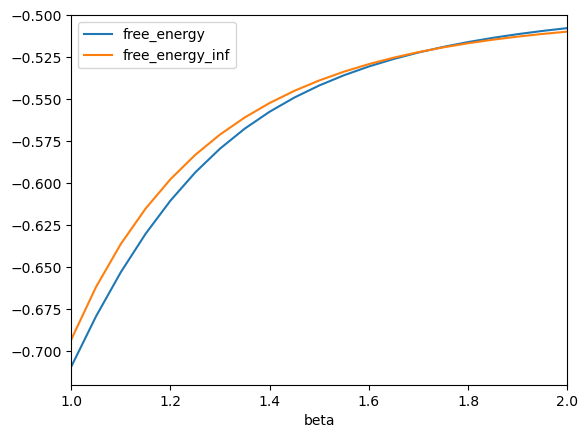

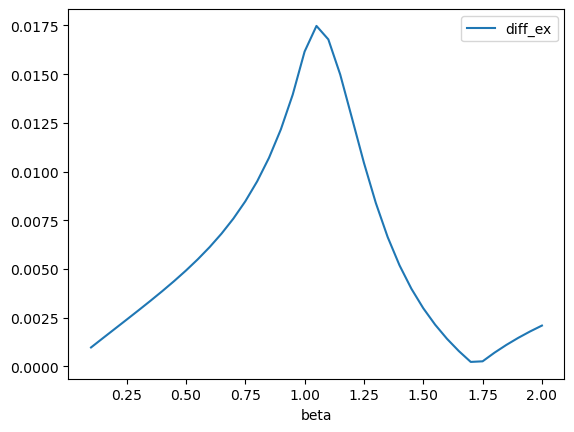

In [12]:
data.plot(x="beta", y= ["free_energy", "free_energy_inf"], ylim=[-0.72,-0.5], xlim=[1,2])
data["diff_ex"] = np.abs(data["free_energy"]- data[ "free_energy_inf"])
data.plot(x="beta", y= "diff_ex")


# Several cases

In [13]:
lr = 0.001
max_step=1000
batch_size=2000
std_fe_limit=1e-4
batch_iter=20

In [14]:
from python_lib.nets import list_nets
importlib.reload(list_nets)
import python_lib.nets.ann
importlib.reload(python_lib.nets.ann)
from python_lib import run_lib
importlib.reload(run_lib);

In [15]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, bias=True, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 2550
Total Params: 2550
step: 0 2.00 fe: -0.507 +- 0.00335 E: -0.447, S: 0.121, M: 0.954953

In [16]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, 
    bias=True, 
    device=device,
    net_depth=2,
    net_width=1
)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE_21",
    batch_iter=batch_iter,
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 5150
Total Params: 5150
step: 0 2.00 fe: -0.508 +- 0.00172 E: -0.446, S: 0.123, M: 0.954953

In [17]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, 
    bias=True, 
    device=device,
    net_depth=2,
    net_width=2
)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE_22",
    batch_iter=batch_iter,
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 10250
Total Params: 10250
step: 0 2.00 fe: -0.508 +- 0.00166 E: -0.444, S: 0.128, M: 0.951952

In [18]:
from python_lib.nets import simple_layer
import importlib
importlib.reload(simple_layer)
net2train = simple_layer.simple_layer(CW_model, bias=True, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_SL",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 2550
Total Params: 2550
step: 0 2.00 fe: -0.507 +- 0.00188 E: -0.448, S: 0.118, M: 0.956954

In [19]:
# from python_lib.nets import ann
# importlib.reload(ann)

# from python_lib.nets import list_nets
# importlib.reload(list_nets)

# one = list_nets.one_var
# input_mask = torch.tril(J_interaction, diagonal=-1)
# input_mask = input_mask.to(dtype=torch.bool)
# dict_nets = {}
# net2train = list_nets.list_nets(CW_model, one, input_mask, device=device, dict_nets=dict_nets)
# res = run_lib.train_net(net2train, betas,
#     lr = lr,
#     max_step=max_step,
#     batch_size=batch_size,
#     std_fe_limit=std_fe_limit,
#     suffix ="_one",
#     batch_iter=batch_iter
# )
# data = pd.concat([data, res], axis = 1)


In [20]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sum_exp_exact",
    exact=True,
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 5294
Total Params: 5294
step: 0 2.00 fe: -0.508 +- 0.00000 E: -0.445, S: 0.125, M: 0.953

In [21]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sum_exp",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 5294
Total Params: 5294
step: 0 2.00 fe: -0.508 +- 0.00021 E: -0.445, S: 0.126, M: 0.952538

In [22]:
# from python_lib.nets import list_nets
# importlib.reload(list_nets)

# list_n = list_nets.CW_net_sp
# input_mask = torch.tril(J_interaction, diagonal=-1)
# input_mask = input_mask.to(dtype=torch.bool)
# dict_nets = {"num_extremes": 1}
# net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
# res = run_lib.train_net(net2train, betas,
#     lr = lr,
#     max_step=max_step,
#     batch_size=batch_size,
#     std_fe_limit=std_fe_limit,
#     suffix ="_sp",
#     batch_iter=batch_iter
# )
# data = pd.concat([data, res], axis = 1)


In [23]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net_sp
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"num_extremes": 2}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sp2",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 982
Total Params: 982
step: 0 2.00 fe: -0.508 +- 0.00111 E: -0.445, S: 0.126, M: 0.953953

In [24]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net_sp
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"num_extremes": 4}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sp4",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 1766
Total Params: 1766
step: 0 2.00 fe: -0.508 +- 0.00040 E: -0.445, S: 0.125, M: 0.953532

In [25]:
data["beta"] = betas

In [26]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]

for kk in name_nets:
    data[f"err_fe{kk}"] = np.abs(data[f"free_energy_mean{kk}"] - data["free_energy"])
    data[f"err_fe{kk}_rel"] = np.abs((data[f"err_fe{kk}"] / data["free_energy"]))


In [27]:
data.to_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

In [ ]:
data.read.csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

<AxesSubplot:xlabel='beta'>

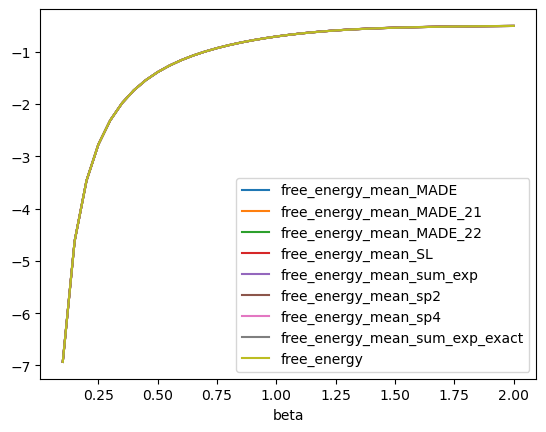

In [28]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
kkk="free_energy_mean"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy")
data.plot(x="beta", y=namess)


<AxesSubplot:xlabel='beta'>

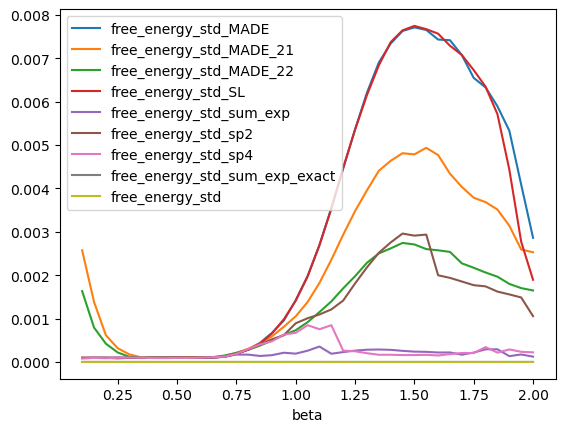

In [29]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
kkk="free_energy_std"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy_std")
data.plot(x="beta", y=namess)

<AxesSubplot:xlabel='beta'>

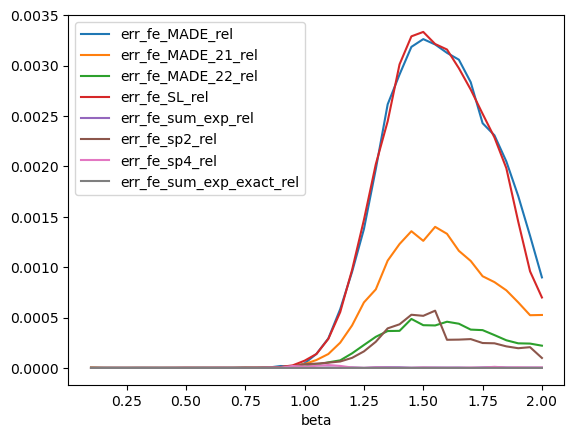

In [30]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
namess=[f"err_fe{x}_rel" for x in name_nets]
#namess.append("free_energy_std")
data.plot(x="beta", y=namess)

<AxesSubplot:xlabel='beta'>

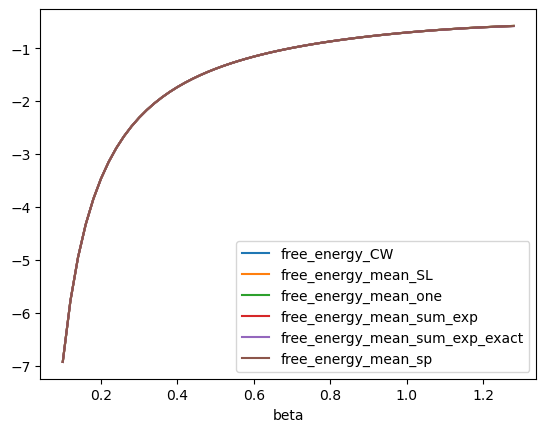

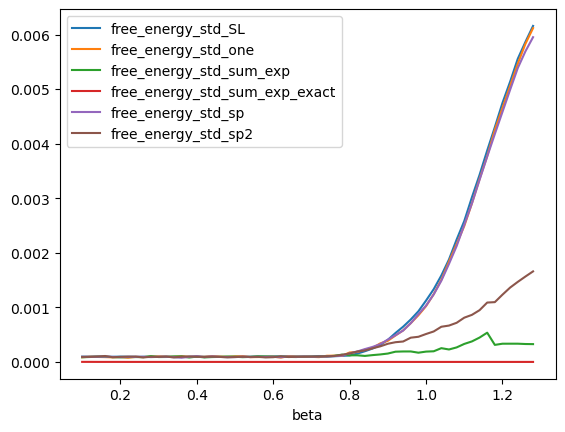

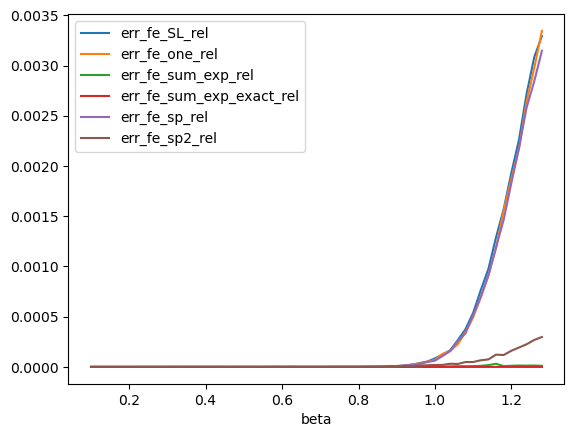

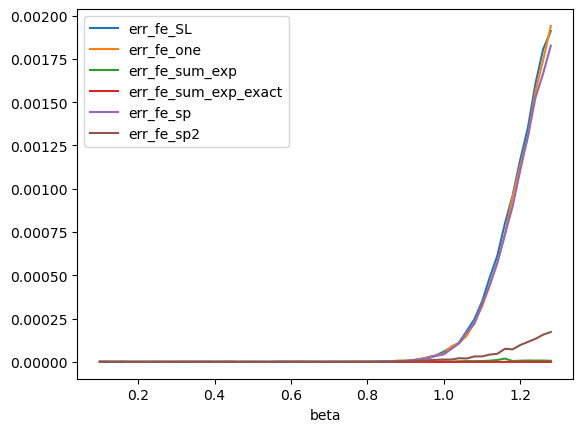

In [27]:

data.plot(x="beta", y=["free_energy_std_SL", "free_energy_std_one", "free_energy_std_sum_exp", "free_energy_std_sum_exp_exact","free_energy_std_sp","free_energy_std_sp2",]) #"free_energy_std_sp4"])
data.plot(x="beta", y=["err_fe_SL_rel", "err_fe_one_rel", "err_fe_sum_exp_rel", "err_fe_sum_exp_exact_rel","err_fe_sp_rel","err_fe_sp2_rel"])#,"err_fe_sp4_rel"])
data.plot(x="beta", y=["err_fe_SL", "err_fe_one", "err_fe_sum_exp", "err_fe_sum_exp_exact", "err_fe_sp", "err_fe_sp2"])# "err_fe_sp4"])

In [ ]:
data.plot(x="beta", y=["mag_mean", "mag_mean_CW", "mag_mean_SL", "mag_mean_one", "mag_mean_sum_exp", "mag_mean_sum_exp_exact"])


KeyError: "['mag_mean'] not in index"

In [129]:
data.plot(x="beta", y=["entropy_mean", "entropy_mean_SL", "entropy_mean_1V", "entropy_mean_SK", "entropy_mean_SK_exact"])


KeyError: "['entropy_mean', 'entropy_mean_1V', 'entropy_mean_SK', 'entropy_mean_SK_exact'] not in index"

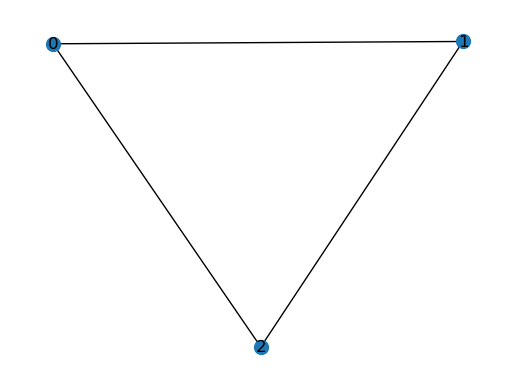

In [30]:
from python_lib.models import spins_model
import python_lib.models
importlib.reload(spins_model)
from python_lib.models import spins_model

N = 3
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)
JJ=1
J_val = JJ/(2*N)
J = J_val * J_interaction


device="cpu"
#device="mps"
CW_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=1.3
beta_init = 0.1
step = 0.1
betas = np.arange(beta_init, beta_fin
, step)

In [31]:
from python_lib.nets import ann
importlib.reload(ann)
from python_lib.nets import list_nets
importlib.reload(list_nets)

one = list_nets.SK_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.long()
dict_nets = {}
net2train = list_nets.list_nets(CW_model, one, input_mask, device=device, dict_nets=dict_nets)

In [33]:
beta = 1
net2train.train(
    beta=beta,
    lr=lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit = 0.001,
    exact=True
)


step: 0 1.00 fe: -0.594 +- 0.24724 E: 0.069, S: 0.662, M: 0.397

{'beta': 1,
 'free_energy_mean': -0.5935537020365397,
 'free_energy_std': 0.2472420334815979,
 'entropy_mean': 0.6624425649642944,
 'energy_mean': 0.06888888776302338,
 'mag': array([ 0.001, -0.008,  0.034], dtype=float32),
 'mag_mean': 0.3966667056083679}

In [51]:
x, hx=net2train.sample(200000)
torch.abs(x.mean(-1)).mean(), x.mean(-1).mean()

(tensor(0.3982), tensor(0.0010))

In [54]:
i = 0
for nnet in net2train.net:
    print(f"ni: {i}")
    i+=1
    for name, param in nnet.named_parameters():
        print(name, param.data)


ni: 0
weight_p tensor([[ 0.3333,  0.0000, -0.3333]])
bias_p tensor([[1.0000, 0.6931, 0.3333]])
weight_m tensor([[ 0.3333,  0.0000, -0.3333]])
bias_m tensor([[0.3333, 0.6931, 1.0000]])
weight_0p tensor([1.])
weight_0m tensor([-1.])
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])
ni: 1
weight_p tensor([[ 0.1667, -0.1667]])
bias_p tensor([[0.3333, 0.0000]])
weight_m tensor([[ 0.1667, -0.1667]])
bias_m tensor([[0.0000, 0.3333]])
weight_0p tensor([1.])
weight_0m tensor([-1.])
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])
ni: 2
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])


In [198]:
m = x.sum(-1)
m

tensor([ 2., -6.])

In [205]:
weight_p = torch.tensor([[1,2,3,4]], device=device)

In [206]:
weight_p

tensor([[1, 2, 3, 4]])

In [208]:
res = weight_p * torch.unsqueeze(m, dim=1)
res

tensor([[  2.,   4.,   6.,   8.],
        [ -6., -12., -18., -24.]])

In [210]:
torch.logsumexp(res, 1)

tensor([ 8.1451, -5.9975])

In [ ]:
pd.__version__

In [ ]:
data.plot(x="beta", y=["free_energy_std_SL", "free_energy_std_1V"], ylim=(0, 0.1))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [ ]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [ ]:
all_Js = np.array(all_Js)

In [ ]:
plt.plot(stats_pd["beta"], all_Js[:,2])
plt.plot(stats_pd["beta"], all_Js[:,3])
plt.plot(stats_pd["beta"], all_Js[:,4])
plt.plot(stats_pd["beta"], all_Js[:,5])
plt.plot(stats_pd["beta"], all_Js[:,19])

In [ ]:
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

In [ ]:
from python_lib.nets import simplest
from python_lib.solvers import train_nn_anneal
importlib.reload(simplest)
importlib.reload(solvers)
bias = True
net_simplest = simplest.simplest(CW_model.N, CW_model, bias, device=device)

In [ ]:
from python_lib.nets import one_var
importlib.reload(one_var)
bias = True
net_one_var = one_var.one_var(CW_model.N, CW_model, bias, device=device)

In [ ]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net_one_var
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

In [ ]:
stats_pd_est = pd.DataFrame(stats)
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd_est["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,0.)

ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"])/np.abs(f_exact))
ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"]))
    
ax2.plot(stats_pd_est["free_energy_std"])

In [ ]:
net_simplest.layer1.weight

In [ ]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=100
batch_size=2000
stats = train_nn_anneal(
    net, 
    np.full(100, 0.0001),
    lr=lr, 
    max_step=5,
    batch_size=batch_size)
stats = train_nn_anneal(
    net, 
    betas,
    lr=lr, 
    max_step=max_step,
    batch_size=batch_size)
stats_pd = pd.DataFrame(stats)

In [ ]:
stats_pd = pd.DataFrame(stats)

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"])/np.abs(f_exact))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"]))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
stats_pd.keys()

In [ ]:
stats_pd[stats_pd["beta"]==0.2]

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(np.linspace(0.001,beta,100), f_exact)
ax0.set_ylim(-1.25,-0.7)

for b in np.linspace(0.001,beta,100):
    
err = [np.abs()]

In [ ]:
net.compute_stats(beta, batch_size=50000)

## random case

In [ ]:
from python_lib.nets import bp_nn
importlib.reload(bp_nn)

net_rand = bp_nn.bp_nn(tree_rand.N, tree_rand, True, z2=False, init_zero=False,)
                      
net_rand.train(beta=beta, lr=0.001, 
           max_step=1000,
               opt="adam")


In [ ]:
net_rand.compute_stat_is(beta, batch_size=10000)

# BP solution

In [ ]:
import bp_solver
importlib.reload(bp_solver)

bp_sol = bp_solver.BP_solver(tree_rand)

In [ ]:
beta

In [ ]:
bp_sol.converge(beta)